In [91]:
import pandas as pd

# Load Excel file
merged_df = pd.read_excel('Merged_df2011to2024.xlsx')
print(merged_df.head())
print(merged_df.dtypes)

  SETTLEMENTDATE  PUBLIC CONTRACTYEAR  WEEKNO REGIONID  TOTAL_SENT_OUT_ENERGY  \
0     2011-06-19                 2011      26      NEM           517176.92330   
1     2011-06-19                 2011      26     NSW1           184666.51280   
2     2011-06-19                 2011      26     QLD1           131836.34120   
3     2011-06-19                 2011      26      SA1            38286.09446   
4     2011-06-19                 2011      26     TAS1            28557.11818   

   TOTAL_EMISSIONS  CO2E_INTENSITY_INDEX  
0    478873.847700                0.9259  
1    175774.740800                0.9518  
2    109354.070200                0.8295  
3     15875.882660                0.4147  
4      3466.795136                0.1214  
SETTLEMENTDATE           datetime64[ns]
PUBLIC CONTRACTYEAR               int64
WEEKNO                            int64
REGIONID                         object
TOTAL_SENT_OUT_ENERGY           float64
TOTAL_EMISSIONS                 float64
CO2E_INTENSITY_

In [92]:
import pandas as pd

# Load CSIRO dataset
csiro_df = pd.read_csv('csiro_2019_to_2025.csv')
print(csiro_df.head())
print(csiro_df.dtypes)

                      timestamp  \
0  2019-01-01T00:00:00.000+0000   
1  2019-01-01T00:05:00.000+0000   
2  2019-01-01T00:10:00.000+0000   
3  2019-01-01T00:15:00.000+0000   
4  2019-01-01T00:20:00.000+0000   

   csiro.energy.dch.agshop.regional_global_emissions.nsw  \
0                                         846.604279       
1                                         846.254053       
2                                         844.686134       
3                                         844.855181       
4                                         846.036643       

   csiro.energy.dch.agshop.regional_global_emissions.qld  \
0                                         758.034566       
1                                         753.005683       
2                                         755.454416       
3                                         752.715869       
4                                         753.859588       

   csiro.energy.dch.agshop.regional_global_emissions.sa  \
0       

In [93]:
# Load 2019 bidding data
bid_2019 = pd.read_csv('Bidstack-April2019.CSV')
print(bid_2019.head())
print(bid_2019.dtypes)

# Load 2025 bidding data
bid_2025 = pd.read_csv('Bidstack-April2025.CSV')
print(bid_2025.head())
print(bid_2025.dtypes)

     INTERVAL_DATETIME      DUID  PRICEBAND1  PRICEBAND2  PRICEBAND3  \
0  2019-04-01 04:05:00       CG1     -982.70        0.00       47.66   
1  2019-04-01 04:05:00      QPS5     -985.40       62.74       97.58   
2  2019-04-01 04:05:00  TARONG#1     -975.20       24.12       47.74   
3  2019-04-01 04:05:00     BDL01    -1028.23       63.75       83.29   
4  2019-04-01 04:05:00    BNGSF1     -970.00     -147.25      -87.30   

   PRICEBAND4  PRICEBAND5  PRICEBAND6  PRICEBAND7  PRICEBAND8  ...  \
0       75.29       94.36      284.98      427.96     2192.18  ...   
1      111.38      122.40      147.58      373.38      569.64  ...   
2       58.46       63.17       81.43      102.91      140.95  ...   
3       88.43       93.57       98.71      113.11      257.06  ...   
4      -58.68        0.00       48.40       67.71       84.78  ...   

   BANDAVAIL3  BANDAVAIL4  BANDAVAIL5  BANDAVAIL6  BANDAVAIL7  BANDAVAIL8  \
0         0.0         0.0         0.0         0.0         0.0        

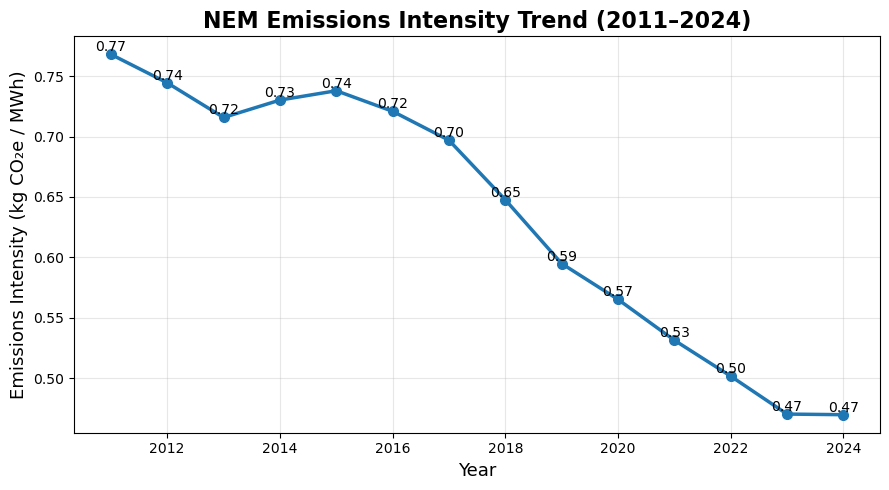

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year
em_trend = df.groupby('Year')['CO2E_INTENSITY_INDEX'].mean().reset_index()

plt.figure(figsize=(9,5))
plt.plot(
    em_trend['Year'], em_trend['CO2E_INTENSITY_INDEX'],
    color='#1f77b4', marker='o', linewidth=2.5, markersize=7
)

# Add value labels to each point
for x, y in zip(em_trend['Year'], em_trend['CO2E_INTENSITY_INDEX']):
    plt.text(x, y, f"{y:.2f}", fontsize=10, ha='center', va='bottom')

plt.title('NEM Emissions Intensity Trend (2011–2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Emissions Intensity (kg CO₂e / MWh)', fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/2252423367.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', reg_pct.shape[1])  # Catchy palette


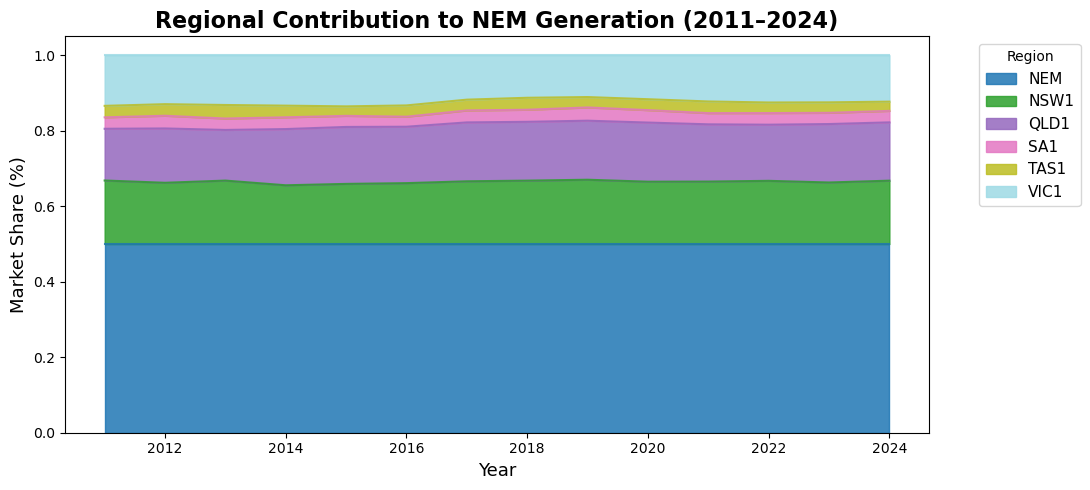

In [5]:
import matplotlib.cm as cm

reg_pivot = df.groupby(['Year', 'REGIONID'])['TOTAL_SENT_OUT_ENERGY'].sum().reset_index()
reg_pivot = reg_pivot.pivot(index='Year', columns='REGIONID', values='TOTAL_SENT_OUT_ENERGY')
reg_pct = reg_pivot.div(reg_pivot.sum(axis=1), axis=0)

color_map = cm.get_cmap('tab20', reg_pct.shape[1])  # Catchy palette
reg_pct.plot.area(
    figsize=(11,5), alpha=0.85, colormap=color_map
)
plt.title('Regional Contribution to NEM Generation (2011–2024)', fontsize=16, fontweight='bold')
plt.ylabel('Market Share (%)', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

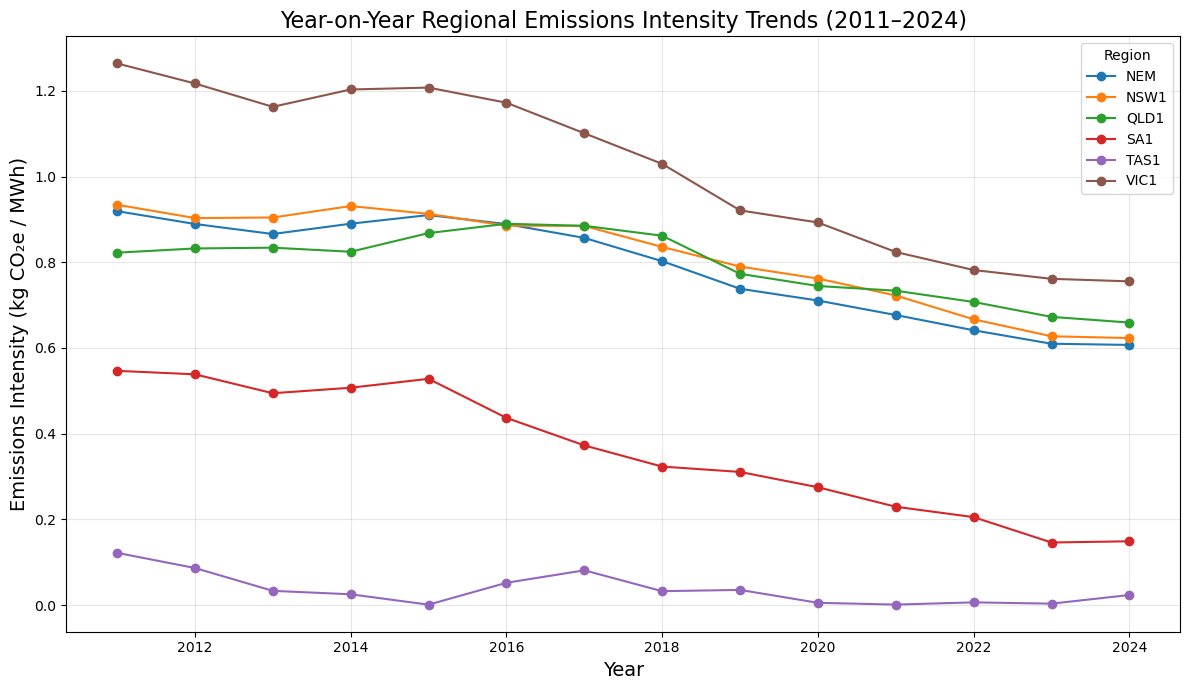

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load main dataset
df = pd.read_excel('Merged_df2011to2024.xlsx')

# Ensure SETTLEMENTDATE is datetime
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])

# Compute yearly average emissions intensity by region
df['Year'] = df['SETTLEMENTDATE'].dt.year
regional_trends = df.groupby(['Year', 'REGIONID'])['CO2E_INTENSITY_INDEX'].mean().reset_index()
pivot = regional_trends.pivot(index='Year', columns='REGIONID', values='CO2E_INTENSITY_INDEX')

# Plot
plt.figure(figsize=(12,7))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker='o', label=col)
plt.title('Year-on-Year Regional Emissions Intensity Trends (2011–2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Emissions Intensity (kg CO₂e / MWh)', fontsize=14)
plt.legend(title='Region')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

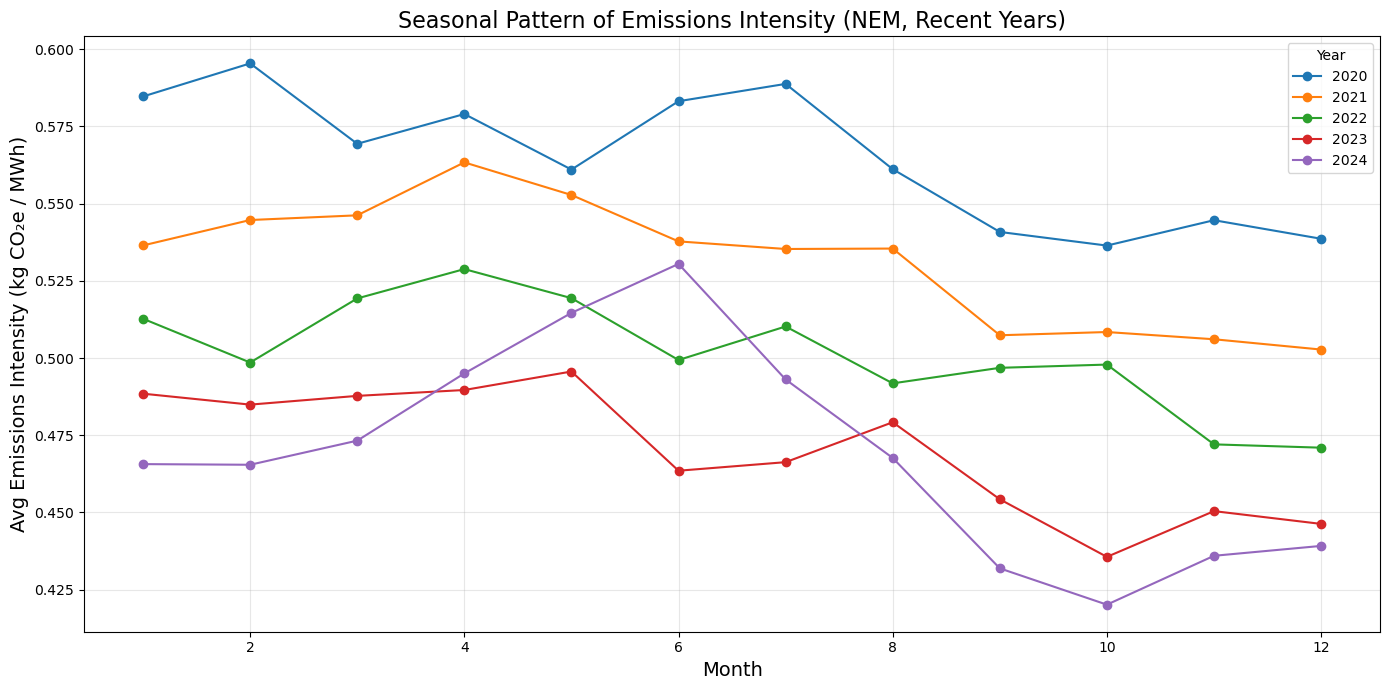

In [7]:
# Add Month column
df['Month'] = df['SETTLEMENTDATE'].dt.month

# Calculate monthly averages for each year (NEM-wide)
monthly_trend = df.groupby(['Year', 'Month'])['CO2E_INTENSITY_INDEX'].mean().reset_index()
pivot = monthly_trend.pivot(index='Month', columns='Year', values='CO2E_INTENSITY_INDEX')

# Plot (last 5 years for clarity)
plt.figure(figsize=(14,7))
years_to_plot = sorted(pivot.columns)[-5:]
for year in years_to_plot:
    plt.plot(pivot.index, pivot[year], marker='o', label=str(year))
plt.title('Seasonal Pattern of Emissions Intensity (NEM, Recent Years)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Avg Emissions Intensity (kg CO₂e / MWh)', fontsize=14)
plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
print(df.columns)

Index(['SETTLEMENTDATE', 'PUBLIC CONTRACTYEAR', 'WEEKNO', 'REGIONID',
       'TOTAL_SENT_OUT_ENERGY', 'TOTAL_EMISSIONS', 'CO2E_INTENSITY_INDEX',
       'Year', 'Month'],
      dtype='object')


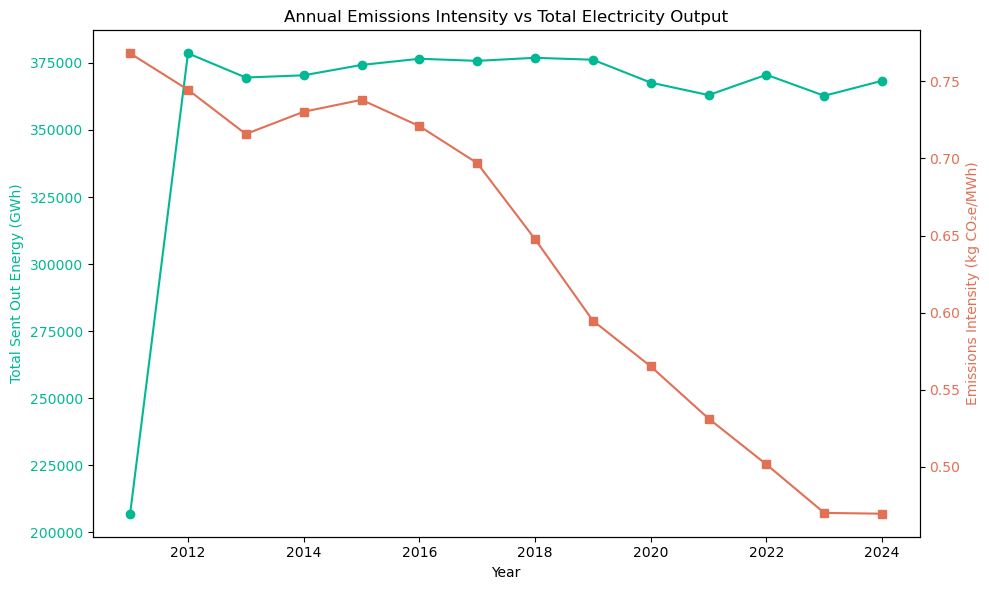

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year

annual = df.groupby('Year').agg({
    'TOTAL_SENT_OUT_ENERGY': 'sum',
    'CO2E_INTENSITY_INDEX': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))

color = '#00b894'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sent Out Energy (GWh)', color=color)
ax1.plot(annual['Year'], annual['TOTAL_SENT_OUT_ENERGY']/1000, color=color, marker='o', label='Total Output (GWh)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color2 = '#e17055'
ax2.set_ylabel('Emissions Intensity (kg CO₂e/MWh)', color=color2)
ax2.plot(annual['Year'], annual['CO2E_INTENSITY_INDEX'], color=color2, marker='s', label='Emissions Intensity')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Annual Emissions Intensity vs Total Electricity Output')
fig.tight_layout()
plt.show()

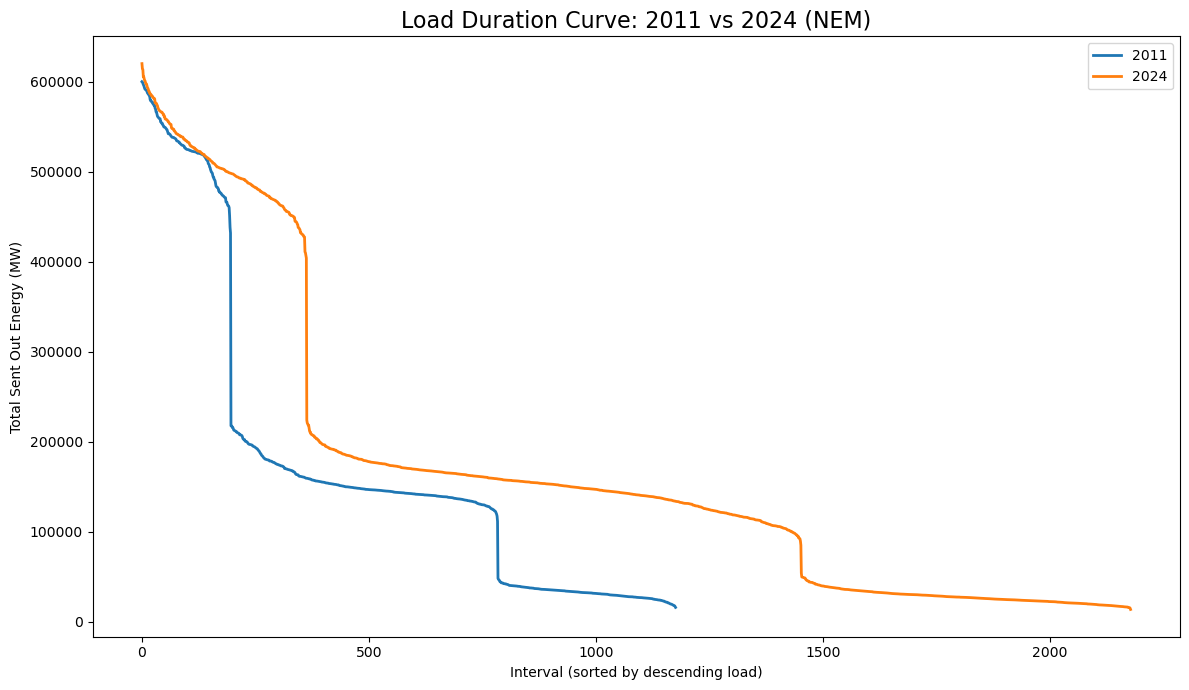

In [10]:
import matplotlib.pyplot as plt

# Filter for two years
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year
load_2011 = df[df['Year'] == 2011]['TOTAL_SENT_OUT_ENERGY']
load_2024 = df[df['Year'] == 2024]['TOTAL_SENT_OUT_ENERGY']

# Sort each in descending order
load_2011_sorted = load_2011.sort_values(ascending=False).reset_index(drop=True)
load_2024_sorted = load_2024.sort_values(ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,7))
plt.plot(load_2011_sorted.values, label='2011', linewidth=2)
plt.plot(load_2024_sorted.values, label='2024', linewidth=2)
plt.title('Load Duration Curve: 2011 vs 2024 (NEM)', fontsize=16)
plt.xlabel('Interval (sorted by descending load)')
plt.ylabel('Total Sent Out Energy (MW)')
plt.legend()
plt.tight_layout()
plt.show()

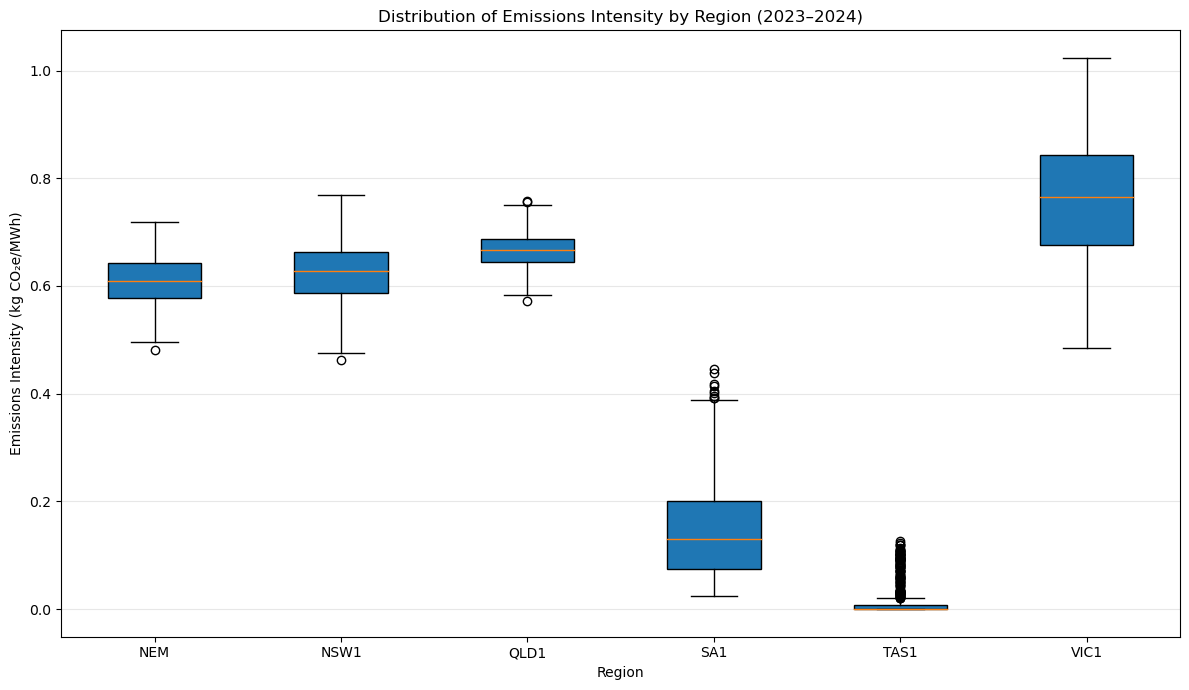

In [11]:
import matplotlib.pyplot as plt

df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year

# Focus on the last 2 years (e.g., 2023 & 2024)
recent_years = [2023, 2024]
df_recent = df[df['Year'].isin(recent_years)]

regions = df_recent['REGIONID'].unique()
data = [df_recent[df_recent['REGIONID'] == region]['CO2E_INTENSITY_INDEX'].dropna() for region in regions]

plt.figure(figsize=(12,7))
plt.boxplot(data, labels=regions, patch_artist=True)
plt.title('Distribution of Emissions Intensity by Region (2023–2024)')
plt.xlabel('Region')
plt.ylabel('Emissions Intensity (kg CO₂e/MWh)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

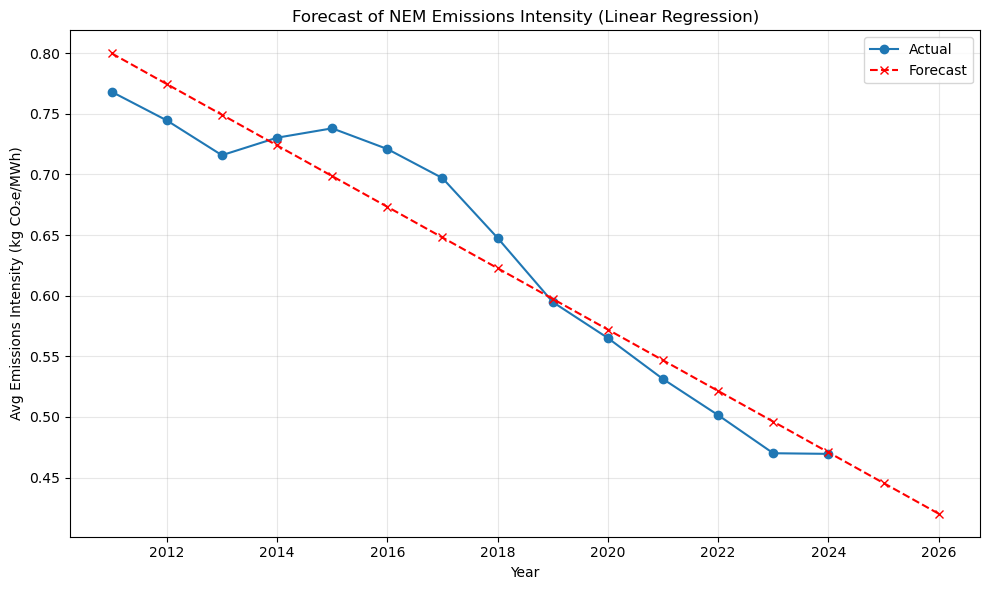

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year

annual = df.groupby('Year')['CO2E_INTENSITY_INDEX'].mean().reset_index()

# Prepare data
X = annual['Year'].values.reshape(-1, 1)
y = annual['CO2E_INTENSITY_INDEX'].values
model = LinearRegression().fit(X, y)

# Predict historical + next 2 years
years_pred = np.arange(annual['Year'].min(), annual['Year'].max() + 3).reshape(-1, 1)
y_pred = model.predict(years_pred)

# Plot
plt.figure(figsize=(10,6))
plt.plot(annual['Year'], annual['CO2E_INTENSITY_INDEX'], marker='o', label='Actual')
plt.plot(years_pred.flatten(), y_pred, linestyle='--', marker='x', color='red', label='Forecast')
plt.title('Forecast of NEM Emissions Intensity (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Avg Emissions Intensity (kg CO₂e/MWh)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

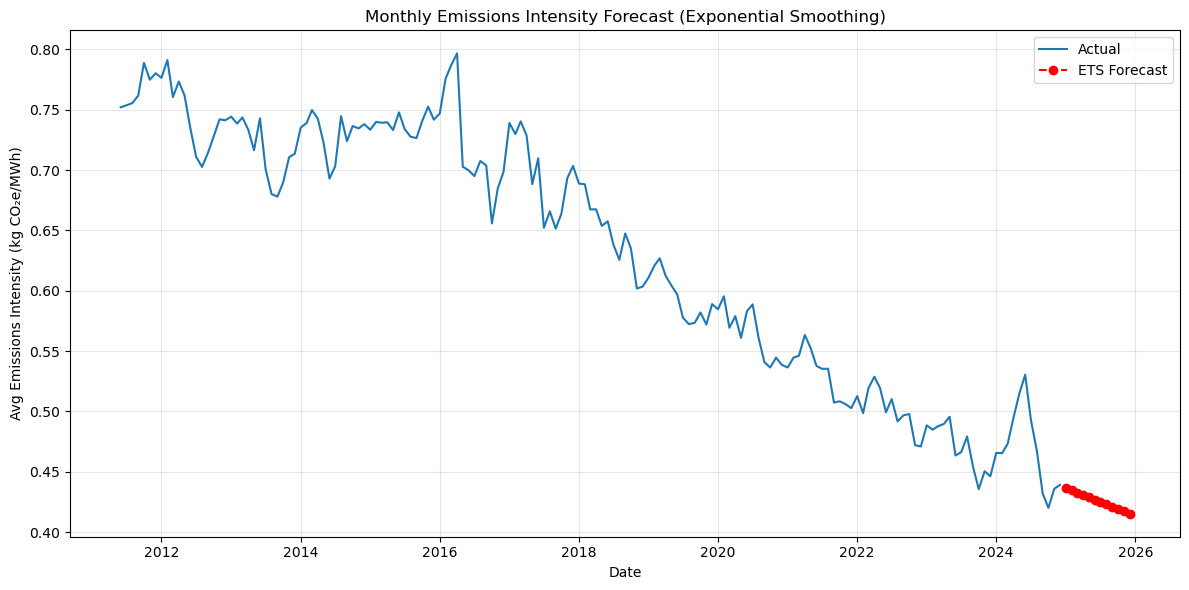

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare monthly emissions intensity data
df = pd.read_excel('Merged_df2011to2024.xlsx')
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])
df['YearMonth'] = df['SETTLEMENTDATE'].dt.to_period('M')
monthly = df.groupby('YearMonth')['CO2E_INTENSITY_INDEX'].mean()
monthly.index = monthly.index.to_timestamp()

# Fit exponential smoothing model (additive trend, no seasonality, can add if enough data)
ets = ExponentialSmoothing(monthly, trend='add', seasonal=None).fit()
forecast_periods = 12  # forecast 12 months ahead
forecast = ets.forecast(forecast_periods)

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly, label='Actual')
plt.plot(forecast, label='ETS Forecast', linestyle='--', marker='o', color='red')
plt.title('Monthly Emissions Intensity Forecast (Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Avg Emissions Intensity (kg CO₂e/MWh)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Random Forest MAE: 0.00 kg CO₂e/MWh


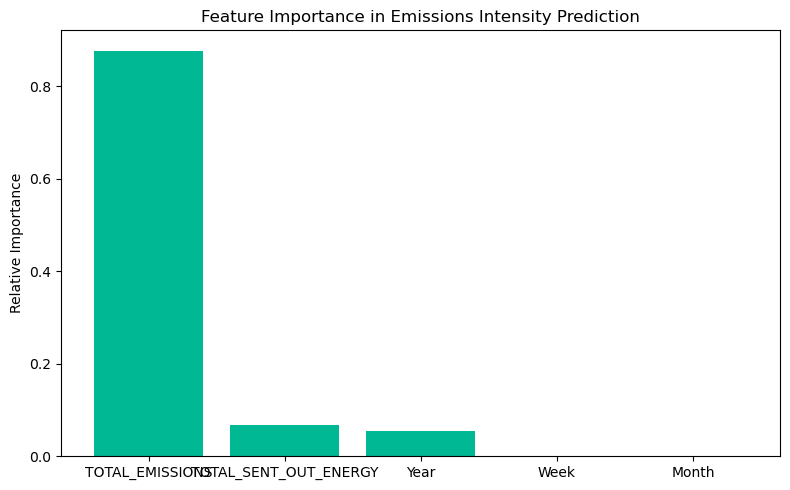

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year
df['Month'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.month
df['Week'] = df['WEEKNO']

# Prepare features and target
features = ['Year', 'Month', 'Week', 'TOTAL_SENT_OUT_ENERGY', 'TOTAL_EMISSIONS']
df = df.dropna(subset=features + ['CO2E_INTENSITY_INDEX'])  # remove rows with NA
X = df[features]
y = df['CO2E_INTENSITY_INDEX']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest MAE: {mae:.2f} kg CO₂e/MWh")

# Feature importance plot
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar([features[i] for i in indices], importances[indices], color='#00b894')
plt.title('Feature Importance in Emissions Intensity Prediction')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

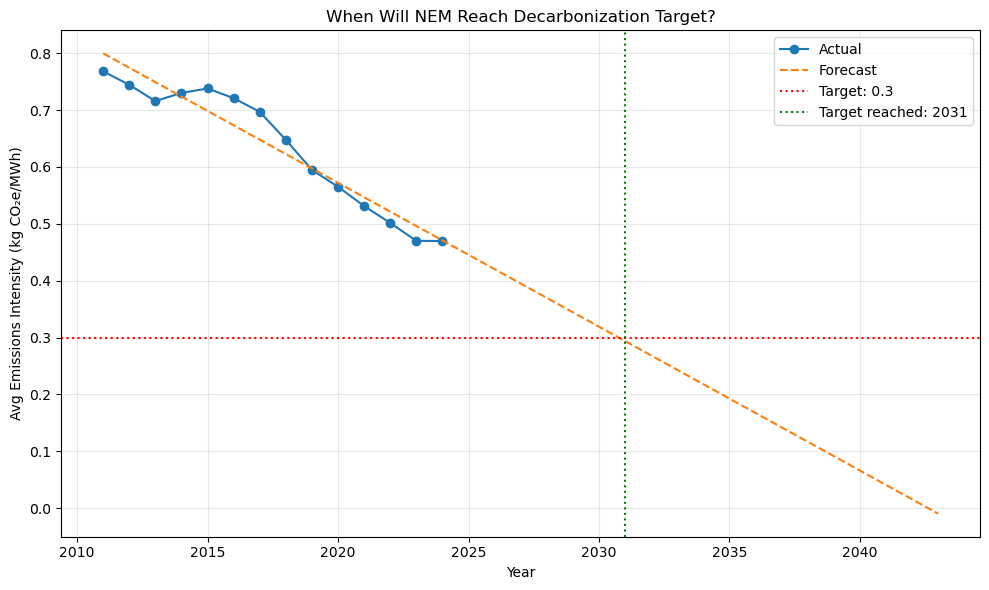

NEM predicted to reach emissions intensity of 0.3 in year 2031.


In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year
annual = df.groupby('Year')['CO2E_INTENSITY_INDEX'].mean().reset_index()

# Linear regression fit
X = annual['Year'].values.reshape(-1, 1)
y = annual['CO2E_INTENSITY_INDEX'].values
model = LinearRegression().fit(X, y)

# Predict far into the future
future_years = np.arange(annual['Year'].min(), annual['Year'].max()+20).reshape(-1, 1)
y_pred = model.predict(future_years)

# Target threshold
target = 0.3  # Set your desired target here
cross_year = None
for year, pred in zip(future_years.flatten(), y_pred):
    if pred <= target:
        cross_year = year
        break

# Plot
plt.figure(figsize=(10,6))
plt.plot(annual['Year'], annual['CO2E_INTENSITY_INDEX'], marker='o', label='Actual')
plt.plot(future_years.flatten(), y_pred, linestyle='--', label='Forecast')
plt.axhline(target, color='red', linestyle=':', label=f'Target: {target}')
if cross_year:
    plt.axvline(cross_year, color='green', linestyle=':', label=f'Target reached: {cross_year}')
plt.title('When Will NEM Reach Decarbonization Target?')
plt.xlabel('Year')
plt.ylabel('Avg Emissions Intensity (kg CO₂e/MWh)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

if cross_year:
    print(f"NEM predicted to reach emissions intensity of {target} in year {cross_year}.")
else:
    print("Target not reached within forecast period.")

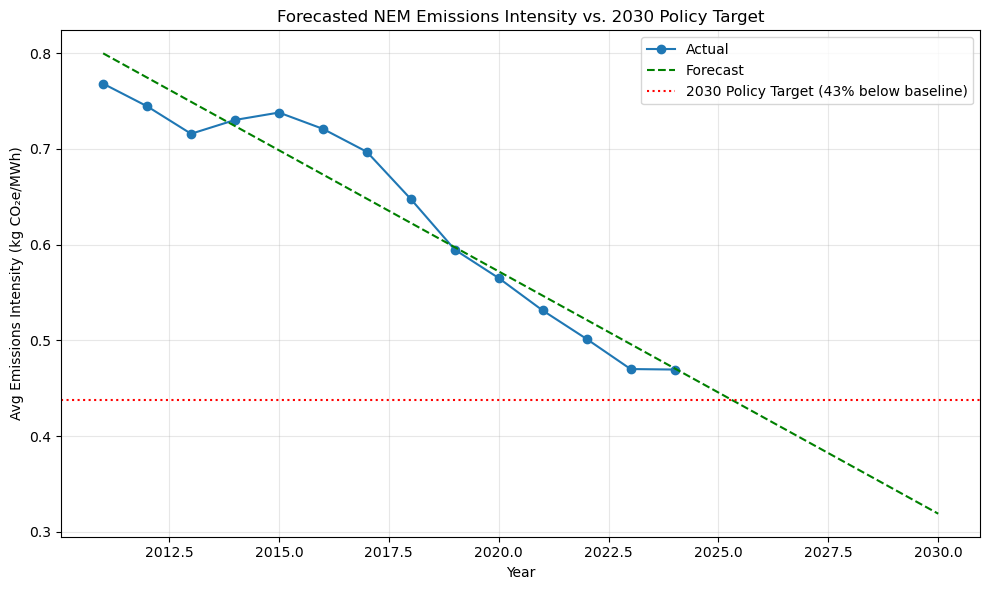

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year
annual = df.groupby('Year')['CO2E_INTENSITY_INDEX'].mean().reset_index()

# Linear regression forecast
X = annual['Year'].values.reshape(-1, 1)
y = annual['CO2E_INTENSITY_INDEX'].values
model = LinearRegression().fit(X, y)

future_years = np.arange(annual['Year'].min(), 2031).reshape(-1, 1)
y_pred = model.predict(future_years)

# Calculate 2030 policy target (43% below baseline, using your earliest year as proxy if 2005 is missing)
base_val = annual.iloc[0]['CO2E_INTENSITY_INDEX']
policy_target_2030 = base_val * (1 - 0.43)

plt.figure(figsize=(10,6))
plt.plot(annual['Year'], annual['CO2E_INTENSITY_INDEX'], marker='o', label='Actual')
plt.plot(future_years.flatten(), y_pred, linestyle='--', color='green', label='Forecast')
plt.axhline(policy_target_2030, color='red', linestyle=':', label='2030 Policy Target (43% below baseline)')
plt.title('Forecasted NEM Emissions Intensity vs. 2030 Policy Target')
plt.xlabel('Year')
plt.ylabel('Avg Emissions Intensity (kg CO₂e/MWh)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

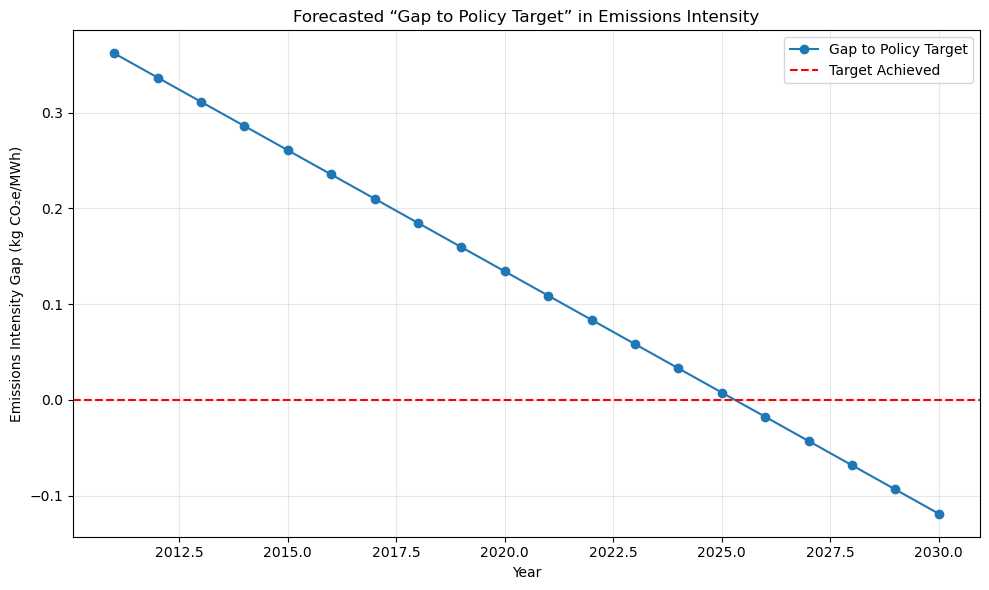

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year
annual = df.groupby('Year')['CO2E_INTENSITY_INDEX'].mean().reset_index()

# Forecast
X = annual['Year'].values.reshape(-1, 1)
y = annual['CO2E_INTENSITY_INDEX'].values
model = LinearRegression().fit(X, y)
future_years = np.arange(annual['Year'].min(), 2031).reshape(-1, 1)
y_pred = model.predict(future_years)

# Policy target line (e.g., 43% below baseline)
base_val = annual.iloc[0]['CO2E_INTENSITY_INDEX']
target_val = base_val * (1 - 0.43)

gap = y_pred - target_val

plt.figure(figsize=(10,6))
plt.plot(future_years.flatten(), gap, marker='o', label='Gap to Policy Target')
plt.axhline(0, color='red', linestyle='--', label='Target Achieved')
plt.title('Forecasted “Gap to Policy Target” in Emissions Intensity')
plt.xlabel('Year')
plt.ylabel('Emissions Intensity Gap (kg CO₂e/MWh)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

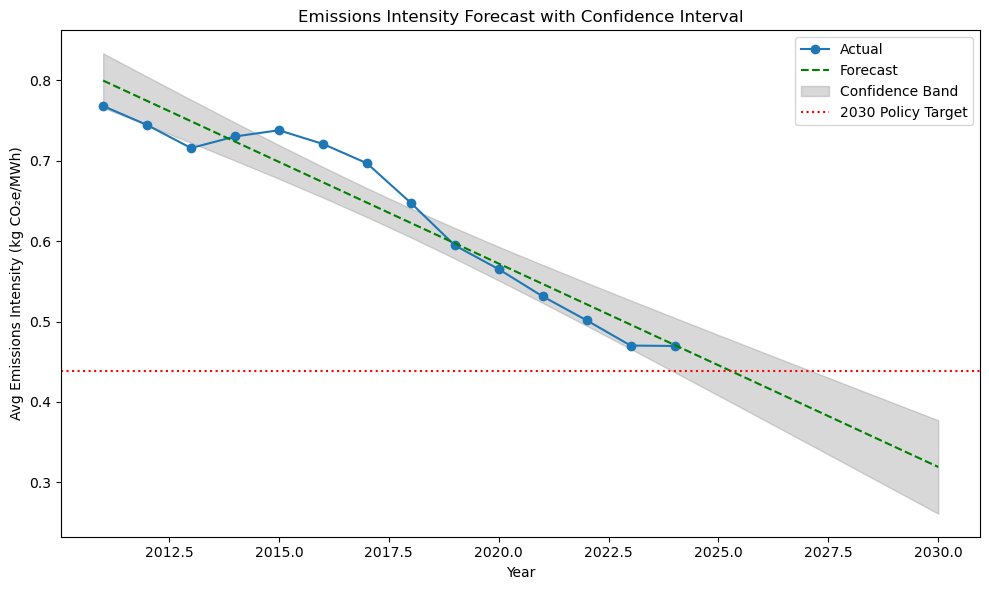

In [18]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
ols = sm.OLS(y, X2).fit()
future_X2 = sm.add_constant(future_years)
pred = ols.get_prediction(future_X2)
pred_int = pred.conf_int()

plt.figure(figsize=(10,6))
plt.plot(annual['Year'], annual['CO2E_INTENSITY_INDEX'], marker='o', label='Actual')
plt.plot(future_years.flatten(), y_pred, linestyle='--', color='green', label='Forecast')
plt.fill_between(future_years.flatten(), pred_int[:,0], pred_int[:,1], color='gray', alpha=0.3, label='Confidence Band')
plt.axhline(target_val, color='red', linestyle=':', label='2030 Policy Target')
plt.title('Emissions Intensity Forecast with Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Avg Emissions Intensity (kg CO₂e/MWh)')
plt.legend()
plt.tight_layout()
plt.show()

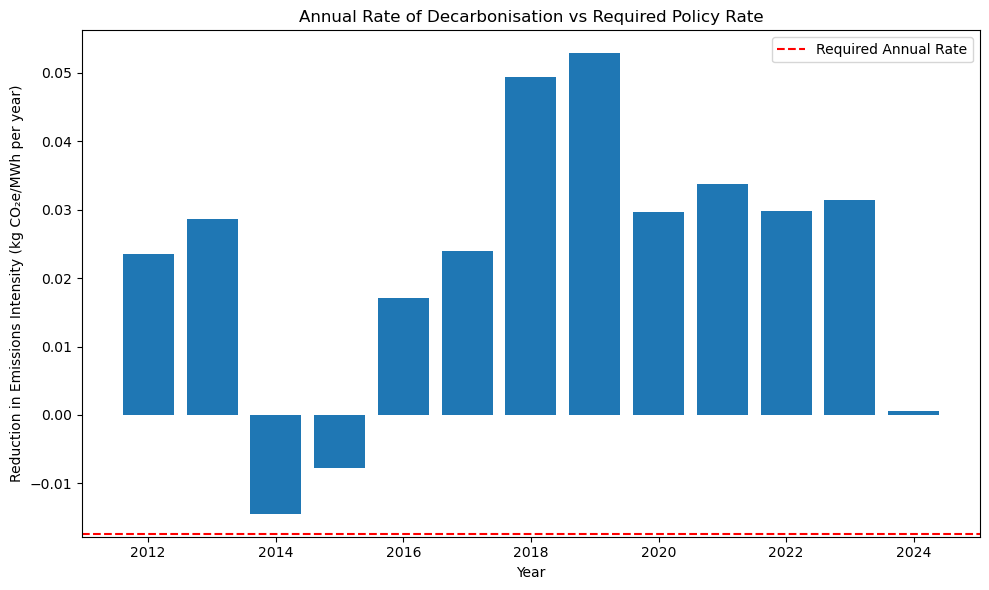

In [19]:
annual['YoY_Change'] = annual['CO2E_INTENSITY_INDEX'].diff() * -1  # Negative = reduction

plt.figure(figsize=(10,6))
plt.bar(annual['Year'], annual['YoY_Change'])
plt.axhline((target_val - base_val)/(2030-annual['Year'].min()), color='red', linestyle='--', label='Required Annual Rate')
plt.title('Annual Rate of Decarbonisation vs Required Policy Rate')
plt.xlabel('Year')
plt.ylabel('Reduction in Emissions Intensity (kg CO₂e/MWh per year)')
plt.legend()
plt.tight_layout()
plt.show()

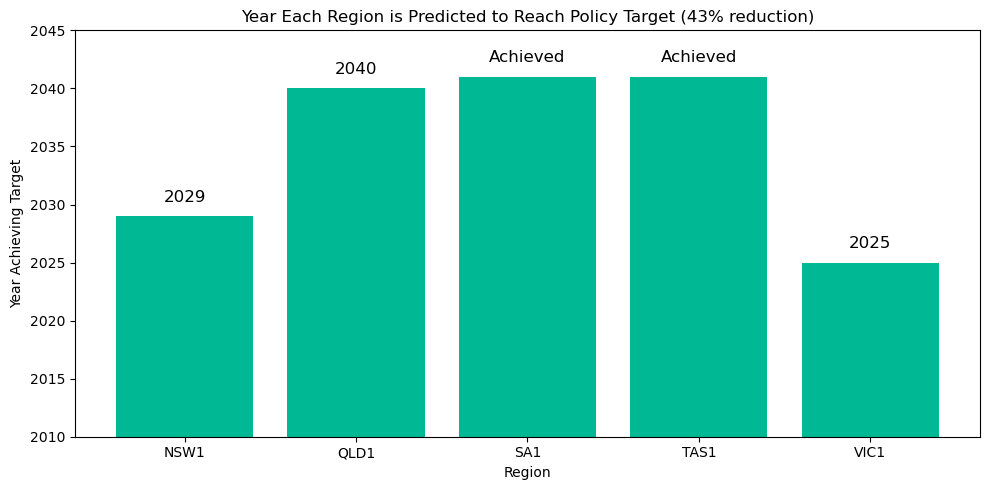

NSW1: 2029
QLD1: 2040
SA1: Achieved
TAS1: Achieved
VIC1: 2025


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_excel('Merged_df2011to2024.xlsx')
df['Year'] = pd.to_datetime(df['SETTLEMENTDATE']).dt.year

regions = ['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']
target_years = {}
achieved_now = []

for region in regions:
    sub = df[df['REGIONID'] == region]
    if sub.empty:
        target_years[region] = None
        continue
    annual = sub.groupby('Year')['CO2E_INTENSITY_INDEX'].mean().reset_index()
    base_val = annual.iloc[0]['CO2E_INTENSITY_INDEX']
    target_val = base_val * (1 - 0.43)
    latest_val = annual.iloc[-1]['CO2E_INTENSITY_INDEX']
    if latest_val < target_val:
        achieved_now.append(region)
        target_years[region] = annual.iloc[-1]['Year']  # Or "Achieved"
        continue
    X = annual['Year'].values.reshape(-1, 1)
    y = annual['CO2E_INTENSITY_INDEX'].values
    model = LinearRegression().fit(X, y)
    future_years = np.arange(annual['Year'].min(), 2041).reshape(-1, 1)
    y_pred = model.predict(future_years)
    cross_year = None
    for year, pred in zip(future_years.flatten(), y_pred):
        if pred <= target_val:
            cross_year = year
            break
    target_years[region] = cross_year

# Create lists for plotting
plot_regions = []
plot_years = []
for region in regions:
    if region in achieved_now:
        plot_regions.append(region)
        plot_years.append("Achieved")
    elif target_years[region] is not None:
        plot_regions.append(region)
        plot_years.append(int(target_years[region]))
    else:
        plot_regions.append(region)
        plot_years.append("Not by 2040")

# Bar chart with labels
plt.figure(figsize=(10,5))
bar_vals = [y if isinstance(y, int) else 2041 for y in plot_years]  # Dummy year for "Achieved"/"Not by 2040"
bars = plt.bar(plot_regions, bar_vals, color='#00b894')
for idx, y in enumerate(plot_years):
    plt.text(idx, bar_vals[idx]+1, str(y), ha='center', va='bottom', fontsize=12)
plt.ylabel('Year Achieving Target')
plt.xlabel('Region')
plt.title('Year Each Region is Predicted to Reach Policy Target (43% reduction)')
plt.ylim(2010, 2045)
plt.tight_layout()
plt.show()

# Print details
for r, y in zip(plot_regions, plot_years):
    print(f"{r}: {y}")

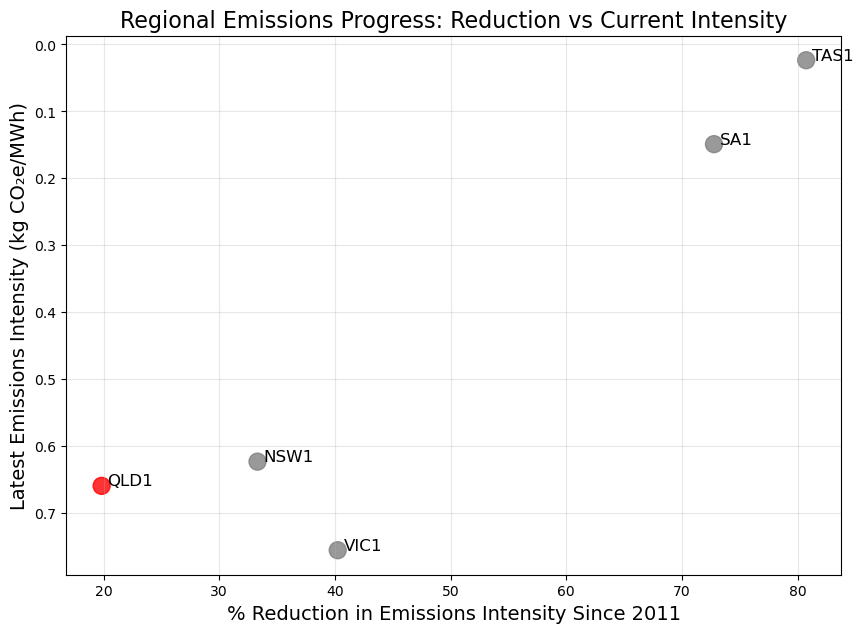

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and prepped with 'Year' column
regions = ['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']

baseline_year = 2011
latest_year = df['Year'].max()

data = []

for region in regions:
    sub = df[df['REGIONID'] == region]
    annual = sub.groupby('Year')['CO2E_INTENSITY_INDEX'].mean().reset_index()
    baseline_val = annual[annual['Year'] == baseline_year]['CO2E_INTENSITY_INDEX'].values[0]
    latest_val = annual[annual['Year'] == latest_year]['CO2E_INTENSITY_INDEX'].values[0]
    reduction_pct = 100 * (baseline_val - latest_val) / baseline_val
    data.append({'Region': region, 'ReductionPct': reduction_pct, 'LatestIntensity': latest_val})

plot_df = pd.DataFrame(data)

plt.figure(figsize=(10,7))
colors = ['red' if x == 'QLD1' else 'gray' for x in plot_df['Region']]
plt.scatter(plot_df['ReductionPct'], plot_df['LatestIntensity'], s=150, c=colors, alpha=0.8)

for i, row in plot_df.iterrows():
    plt.text(row['ReductionPct'] + 0.5, row['LatestIntensity'], row['Region'], fontsize=12)

plt.gca().invert_yaxis()  # Lower emissions on top
plt.xlabel('% Reduction in Emissions Intensity Since 2011', fontsize=14)
plt.ylabel('Latest Emissions Intensity (kg CO₂e/MWh)', fontsize=14)
plt.title('Regional Emissions Progress: Reduction vs Current Intensity', fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
mapping_2025 = pd.read_excel('NEM-Generation-Information-April-2025.xlsx', sheet_name='ExistingGeneration&NewDevs', header=1)
print(mapping_2025.columns)
print(mapping_2025[['DUID', 'Region', 'Fuel Type', 'Technology Type']].head())

Index(['Region', 'Asset Type', 'Site Name', 'Owner', 'Technology Type',
       'Fuel Type', 'DUID', 'Number of Units', 'Lower Nameplate Capacity (MW)',
       'Upper Nameplate Capacity (MW)',
       'Aggregated Lower Nameplate Capacity (MW)',
       'Aggregated Upper Nameplate Capacity (MW)', 'Nameplate Capacity (MW)',
       'Storage Capacity (MWh)', 'Unit Status', 'Dispatch Type',
       'Full Commercial Use Date', 'Expected Closure Year', 'Closure Date',
       'Status Bucket Summary', 'Fuel Bucket Summary', 'SurveyId',
       'AEMO KCI Id', 'Survey Last Requested', 'Survey Version DateTime'],
      dtype='object')
     DUID Region      Fuel Type       Technology Type
0     NaN   QLD1  Other - Other     Storage - Battery
1  ADPPV3    SA1  Solar - Solar      Solar PV - Fixed
2  ADPMH1    SA1  Hydro - Water  Hydro - Run of River
3  ADPPV2    SA1  Solar - Solar      Solar PV - Fixed
4  ADPBA1    SA1  Other - Other     Storage - Battery


In [23]:
merged = bid_2025.merge(mapping_2025[['DUID', 'Region', 'Fuel Type']], on='DUID', how='left')

In [24]:
print(merged.columns)

Index(['INTERVAL_DATETIME', 'DUID', 'PRICEBAND1', 'PRICEBAND2', 'PRICEBAND3',
       'PRICEBAND4', 'PRICEBAND5', 'PRICEBAND6', 'PRICEBAND7', 'PRICEBAND8',
       'PRICEBAND9', 'PRICEBAND10', 'BANDAVAIL1', 'BANDAVAIL2', 'BANDAVAIL3',
       'BANDAVAIL4', 'BANDAVAIL5', 'BANDAVAIL6', 'BANDAVAIL7', 'BANDAVAIL8',
       'BANDAVAIL9', 'BANDAVAIL10', 'Region_x', 'Generation Type', 'Region_y',
       'Fuel Type'],
      dtype='object')


In [25]:
qld_bids_2025 = merged[merged['Region_x'].str.upper().str.startswith('QLD')]

In [26]:
print(qld_bids_2025)

           INTERVAL_DATETIME      DUID  PRICEBAND1  PRICEBAND2  PRICEBAND3  \
288      2025-04-01 04:05:00   GSTONE6      -940.3       71.30       85.41   
289      2025-04-01 04:10:00   GSTONE6      -940.3       71.30       85.41   
290      2025-04-01 04:15:00   GSTONE6      -940.3       71.30       85.41   
291      2025-04-01 04:20:00   GSTONE6      -940.3       71.30       85.41   
292      2025-04-01 04:25:00   GSTONE6      -940.3       71.30       85.41   
...                      ...       ...         ...         ...         ...   
1744411  2025-05-01 03:40:00  TARONG#3      -971.6       33.76       53.20   
1744412  2025-05-01 03:45:00  TARONG#3      -971.6       33.76       53.20   
1744413  2025-05-01 03:50:00  TARONG#3      -971.6       33.76       53.20   
1744414  2025-05-01 03:55:00  TARONG#3      -971.6       33.76       53.20   
1744415  2025-05-01 04:00:00  TARONG#3      -971.6       33.76       53.20   

         PRICEBAND4  PRICEBAND5  PRICEBAND6  PRICEBAND7  PRICEB

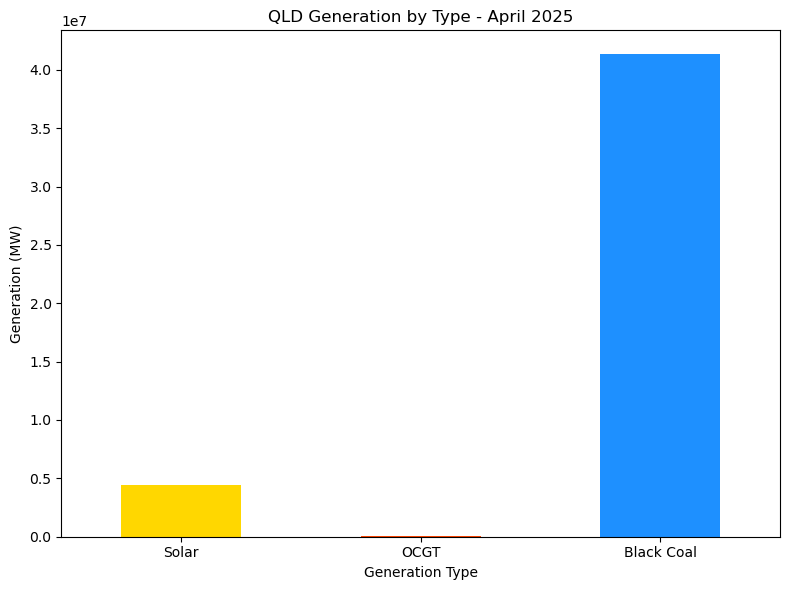

In [27]:
import matplotlib.pyplot as plt

# Define the three generation types of interest
gen_types = ['Solar', 'OCGT', 'Black Coal']

# Filter QLD bids for these generation types
qld_selected = qld_bids_2025[
    (qld_bids_2025['Region_x'].str.upper().str.startswith('QLD')) &
    (qld_bids_2025['Generation Type'].isin(gen_types))
]

# Sum BANDAVAIL1 by Generation Type
gen_sums = qld_selected.groupby('Generation Type')['BANDAVAIL1'].sum()

# Plotting
plt.figure(figsize=(8,6))
colors = ['#FFD700', '#FF4500', '#1E90FF']  # Gold, OrangeRed, DodgerBlue for Solar, OCGT, Black Coal

gen_sums.loc[gen_types].plot(kind='bar', color=colors)
plt.title('QLD Generation by Type - April 2025')
plt.ylabel('Generation (MW)')
plt.xlabel('Generation Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


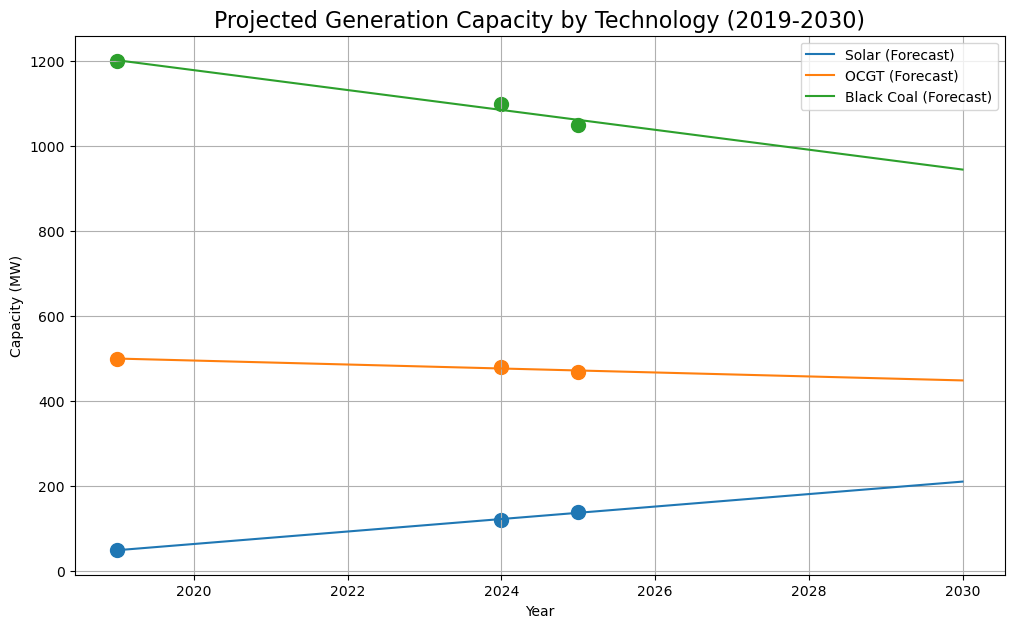

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example data: Replace with your actual aggregated capacity data per year
data = {
    'Year': [2019, 2024, 2025],
    'Solar': [50, 120, 140],     # MW
    'OCGT': [500, 480, 470],     # MW
    'Black Coal': [1200, 1100, 1050]  # MW
}

df = pd.DataFrame(data)

years_future = np.arange(2019, 2031).reshape(-1, 1)

plt.figure(figsize=(12,7))

for tech in ['Solar', 'OCGT', 'Black Coal']:
    # Prepare data
    X = df['Year'].values.reshape(-1, 1)
    y = df[tech].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict future
    y_pred = model.predict(years_future)
    
    # Plot historical + forecast
    plt.plot(years_future, y_pred, label=f'{tech} (Forecast)')
    plt.scatter(df['Year'], y, marker='o', s=100)  # historical points

plt.title('Projected Generation Capacity by Technology (2019-2030)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


/Users/hassan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hassan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hassan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hassan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

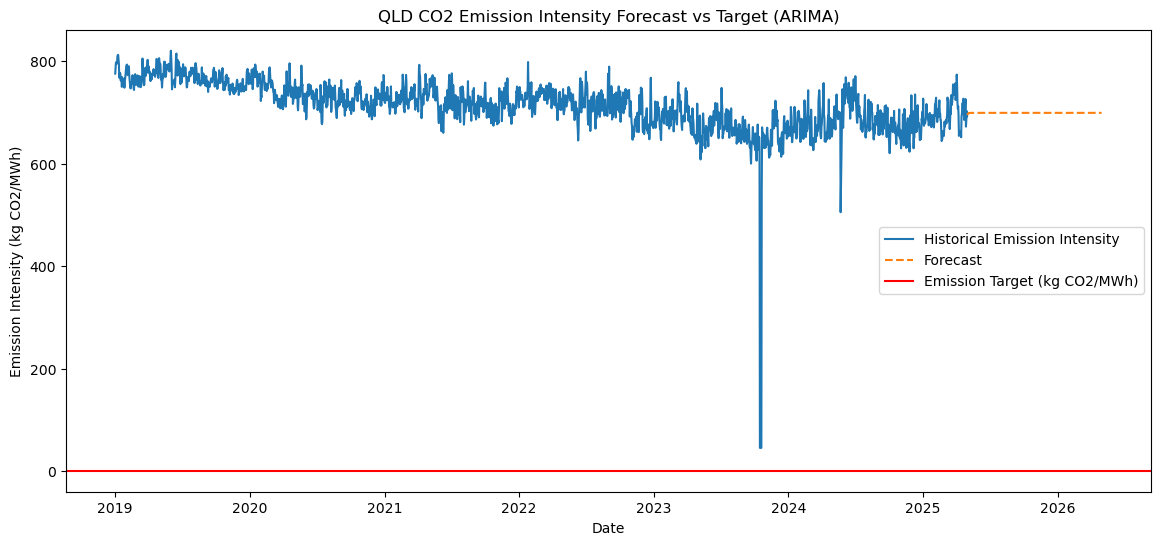

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Prepare daily emission intensity series
daily_emissions = csiro_df[['timestamp', 'csiro.energy.dch.agshop.regional_global_emissions.qld']].copy()
daily_emissions['timestamp'] = pd.to_datetime(daily_emissions['timestamp']).dt.date
emission_ts = daily_emissions.groupby('timestamp').mean()
emission_ts.index = pd.to_datetime(emission_ts.index)

# Fit ARIMA model (p,d,q) can be adjusted based on data
model = ARIMA(emission_ts, order=(1,1,1))
model_fit = model.fit()

# Forecast next 365 days
forecast = model_fit.get_forecast(steps=365)
forecast_index = pd.date_range(start=emission_ts.index[-1], periods=365+1, inclusive='right')

# Plot
plt.figure(figsize=(14,6))
plt.plot(emission_ts.index, emission_ts.values, label='Historical Emission Intensity')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', linestyle='--')
plt.axhline(y=0.4, color='red', linestyle='-', label='Emission Target (kg CO2/MWh)')
plt.title('QLD CO2 Emission Intensity Forecast vs Target (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Emission Intensity (kg CO2/MWh)')
plt.legend()
plt.show()

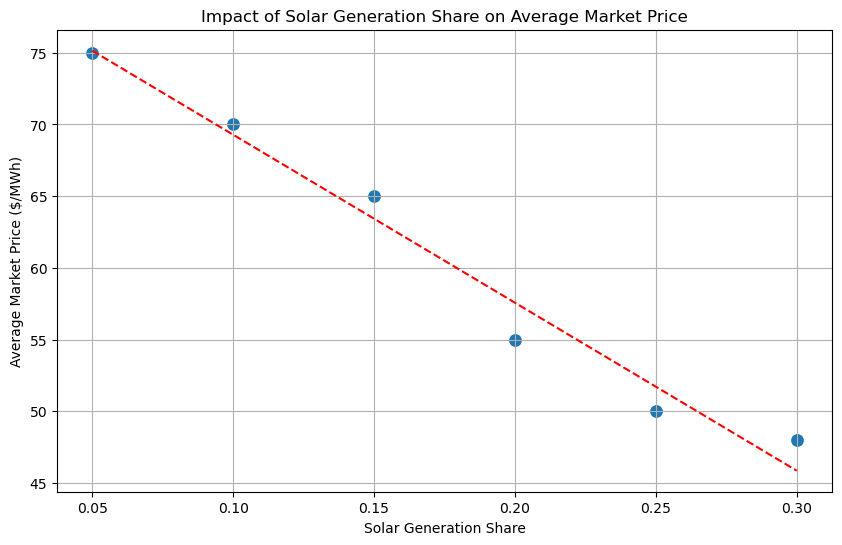

In [31]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Example: Assume you have monthly data with columns ['SolarShare', 'AvgPrice']
df_prices = pd.DataFrame({
    'SolarShare': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'AvgPrice': [75, 70, 65, 55, 50, 48]
})

plt.figure(figsize=(10,6))
sns.scatterplot(x='SolarShare', y='AvgPrice', data=df_prices, s=100)

# Fit linear regression
X = df_prices['SolarShare'].values.reshape(-1,1)
y = df_prices['AvgPrice'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(df_prices['SolarShare'], y_pred, color='red', linestyle='--')

plt.title('Impact of Solar Generation Share on Average Market Price')
plt.xlabel('Solar Generation Share')
plt.ylabel('Average Market Price ($/MWh)')
plt.grid(True)
plt.show()

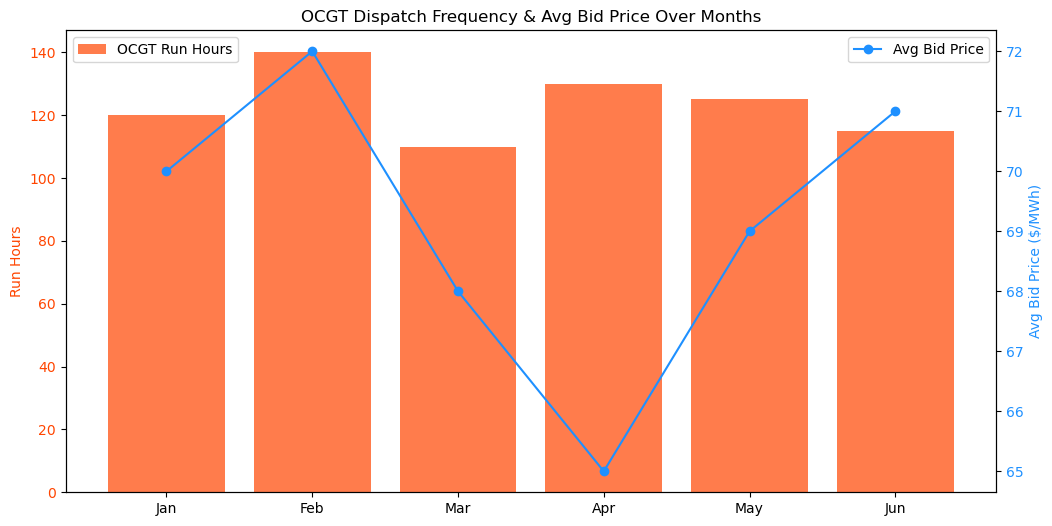

In [32]:
# Example data for months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
run_hours = [120, 140, 110, 130, 125, 115]  # monthly run hours
avg_prices = [70, 72, 68, 65, 69, 71]       # avg bid prices

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(months, run_hours, color='#FF4500', alpha=0.7, label='OCGT Run Hours')
ax1.set_ylabel('Run Hours', color='#FF4500')
ax1.tick_params(axis='y', labelcolor='#FF4500')

ax2 = ax1.twinx()
ax2.plot(months, avg_prices, color='#1E90FF', marker='o', label='Avg Bid Price')
ax2.set_ylabel('Avg Bid Price ($/MWh)', color='#1E90FF')
ax2.tick_params(axis='y', labelcolor='#1E90FF')

plt.title('OCGT Dispatch Frequency & Avg Bid Price Over Months')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

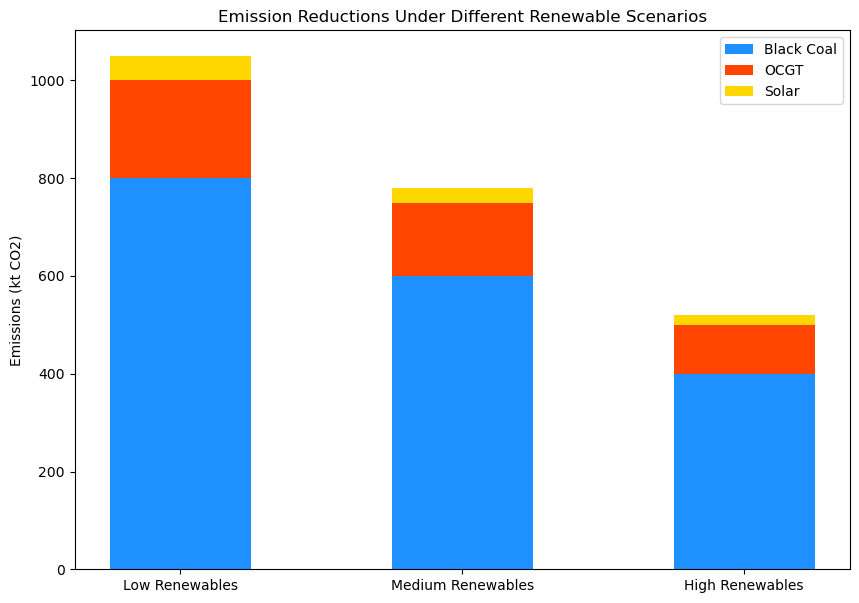

In [33]:
import numpy as np

# Example data
scenarios = ['Low Renewables', 'Medium Renewables', 'High Renewables']
emissions_black_coal = [800, 600, 400]
emissions_ocgt = [200, 150, 100]
emissions_solar = [50, 30, 20]

ind = np.arange(len(scenarios))
width = 0.5

plt.figure(figsize=(10,7))
p1 = plt.bar(ind, emissions_black_coal, width, label='Black Coal', color='#1E90FF')
p2 = plt.bar(ind, emissions_ocgt, width, bottom=emissions_black_coal, label='OCGT', color='#FF4500')
bottoms = np.array(emissions_black_coal) + np.array(emissions_ocgt)
p3 = plt.bar(ind, emissions_solar, width, bottom=bottoms, label='Solar', color='#FFD700')

plt.ylabel('Emissions (kt CO2)')
plt.title('Emission Reductions Under Different Renewable Scenarios')
plt.xticks(ind, scenarios)
plt.legend()
plt.show()

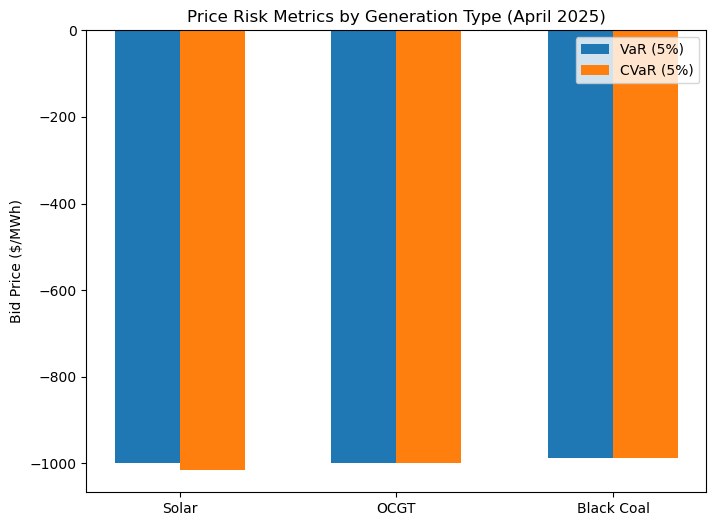

In [34]:
def calculate_var_cvar(df, gen_type, alpha=0.05):
    prices = df[df['Generation Type'].str.upper() == gen_type.upper()]['PRICEBAND1']
    var = np.percentile(prices, alpha*100)
    cvar = prices[prices <= var].mean()
    return var, cvar

gen_types = ['Solar', 'OCGT', 'Black Coal']
risk_metrics = {}
for gen in gen_types:
    var, cvar = calculate_var_cvar(bid_2025, gen)
    risk_metrics[gen] = {'VaR': var, 'CVaR': cvar}

# Visualization
fig, ax = plt.subplots(figsize=(8,6))
width = 0.3
x = np.arange(len(gen_types))
vars_ = [risk_metrics[gen]['VaR'] for gen in gen_types]
cvars = [risk_metrics[gen]['CVaR'] for gen in gen_types]

ax.bar(x - width/2, vars_, width, label='VaR (5%)')
ax.bar(x + width/2, cvars, width, label='CVaR (5%)')
ax.set_xticks(x)
ax.set_xticklabels(gen_types)
ax.set_ylabel('Bid Price ($/MWh)')
ax.set_title('Price Risk Metrics by Generation Type (April 2025)')
ax.legend()
plt.show()

In [ ]:
pip install arch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gen = 'OCGT'
prices = bid_2025[bid_2025['Generation Type'].str.upper() == gen.upper()]['PRICEBAND1']

# Calculate returns and rolling volatility (e.g., 1-hour window if data is 5-min interval)
returns = prices.pct_change().dropna()
rolling_vol = returns.rolling(window=12).std()  # 12 periods = 1 hour if 5-min data

plt.figure(figsize=(10,5))
plt.plot(rolling_vol, label=f'{gen} Rolling Volatility')
plt.title(f'Rolling Volatility of {gen} Bid Prices (Approx. 1-hour window)')
plt.ylabel('Volatility (std of returns)')
plt.legend()
plt.show()

In [ ]:
pip install casualimpact

In [ ]:
pip install mgwr

Solar - Number of Price Spikes > $1000: 0


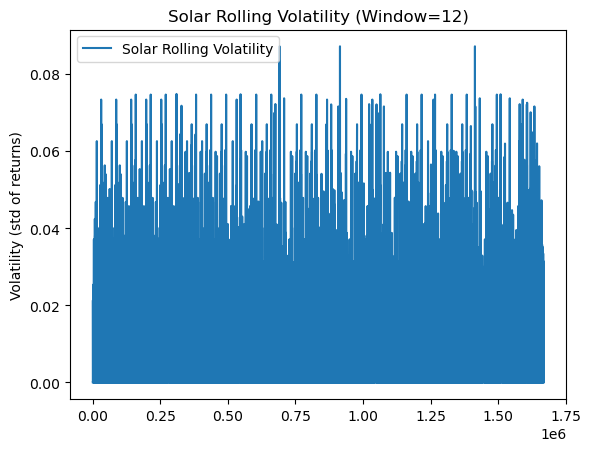

OCGT - Number of Price Spikes > $1000: 0


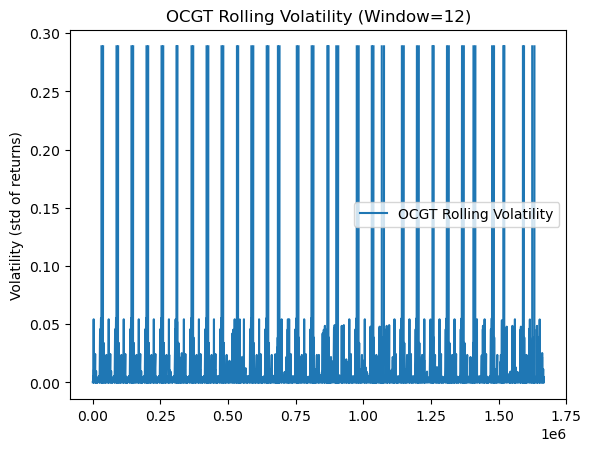

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_volatility_and_spikes(bid_data, gen_type, window=12, spike_threshold=1000):
    prices = bid_data[bid_data['Generation Type'].str.upper() == gen_type.upper()]['PRICEBAND1']
    returns = prices.pct_change().dropna()
    rolling_vol = returns.rolling(window=window).std()
    spikes = (prices > spike_threshold).sum()
    print(f"{gen_type} - Number of Price Spikes > ${spike_threshold}: {spikes}")
    
    plt.plot(rolling_vol, label=f'{gen_type} Rolling Volatility')
    plt.title(f'{gen_type} Rolling Volatility (Window={window})')
    plt.ylabel('Volatility (std of returns)')
    plt.legend()
    plt.show()

analyze_volatility_and_spikes(bid_2025, 'Solar')
analyze_volatility_and_spikes(bid_2025, 'OCGT')

/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/346270173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


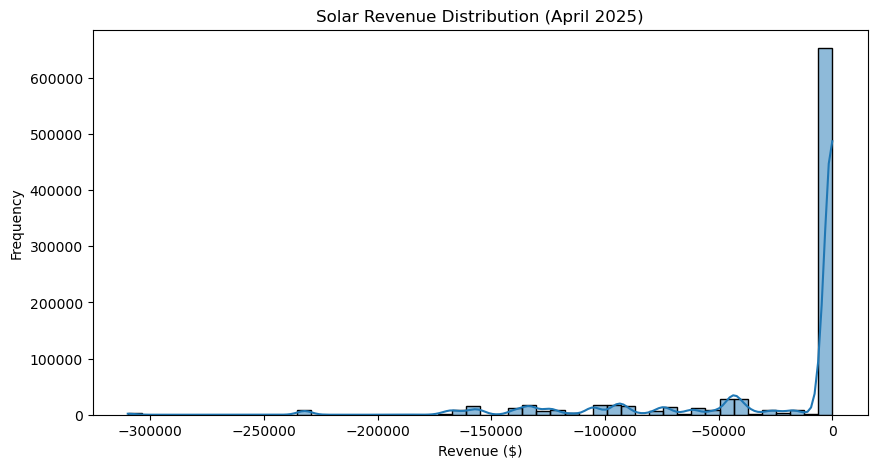

Solar Revenue Mean: $-26,049
Solar Revenue Std Dev: $50,724


/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/346270173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


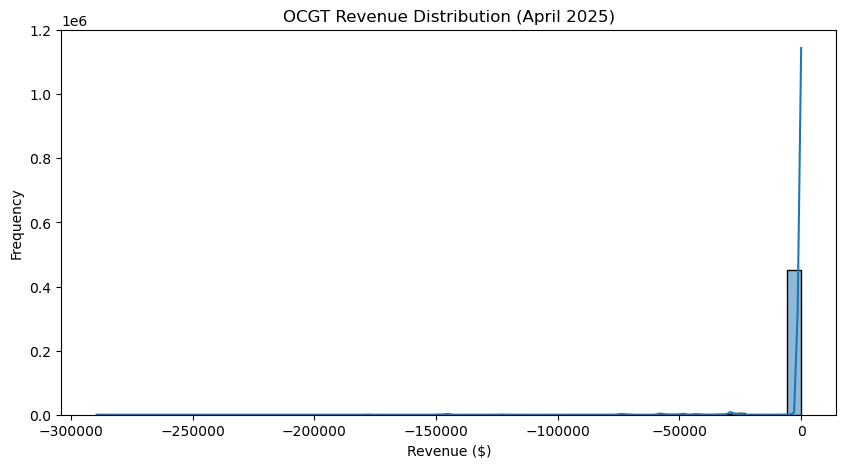

OCGT Revenue Mean: $-1,805
OCGT Revenue Std Dev: $12,393


In [37]:
import seaborn as sns

def revenue_stats(bid_data, gen_type):
    df = bid_data[bid_data['Generation Type'].str.upper() == gen_type.upper()]
    df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']
    plt.figure(figsize=(10,5))
    sns.histplot(df['Revenue'], bins=50, kde=True)
    plt.title(f'{gen_type} Revenue Distribution (April 2025)')
    plt.xlabel('Revenue ($)')
    plt.ylabel('Frequency')
    plt.show()
    print(f"{gen_type} Revenue Mean: ${df['Revenue'].mean():,.0f}")
    print(f"{gen_type} Revenue Std Dev: ${df['Revenue'].std():,.0f}")

revenue_stats(bid_2025, 'Solar')
revenue_stats(bid_2025, 'OCGT')

/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/3227802227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']


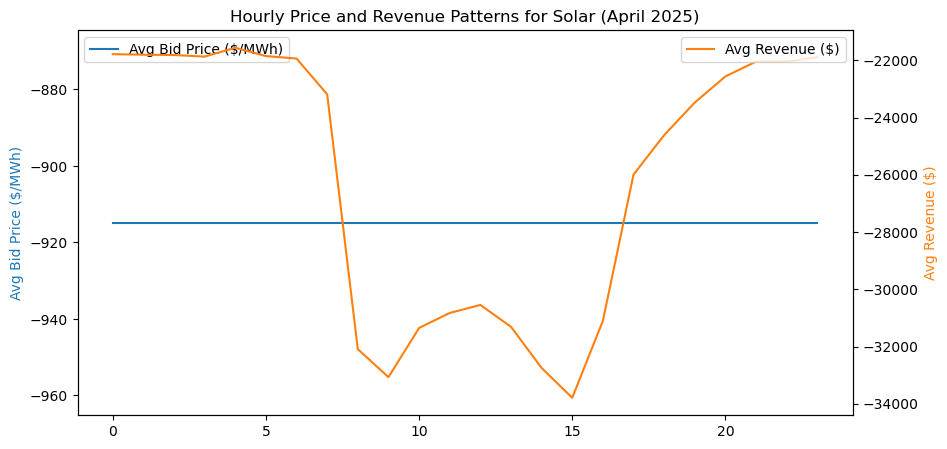

/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/3227802227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']


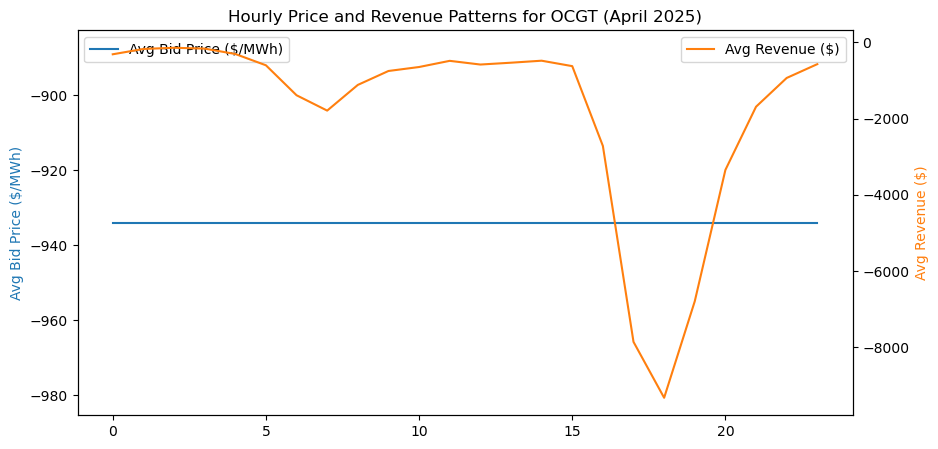

In [38]:
bid_2025['Hour'] = pd.to_datetime(bid_2025['INTERVAL_DATETIME']).dt.hour

def hourly_patterns(bid_data, gen_type):
    df = bid_data[bid_data['Generation Type'].str.upper() == gen_type.upper()]
    df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']
    hourly_prices = df.groupby('Hour')['PRICEBAND1'].mean()
    hourly_revenue = df.groupby('Hour')['Revenue'].mean()
    
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax1.plot(hourly_prices, color='tab:blue', label='Avg Bid Price ($/MWh)')
    ax1.set_ylabel('Avg Bid Price ($/MWh)', color='tab:blue')
    ax2 = ax1.twinx()
    ax2.plot(hourly_revenue, color='tab:orange', label='Avg Revenue ($)')
    ax2.set_ylabel('Avg Revenue ($)', color='tab:orange')
    plt.title(f'Hourly Price and Revenue Patterns for {gen_type} (April 2025)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

hourly_patterns(bid_2025, 'Solar')
hourly_patterns(bid_2025, 'OCGT')

/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4243249223.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INTERVAL_DATETIME'] = pd.to_datetime(df['INTERVAL_DATETIME'])
/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4243249223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']
/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4243249223.py:15: FutureWarning: 'H' is deprecated and will be removed in 

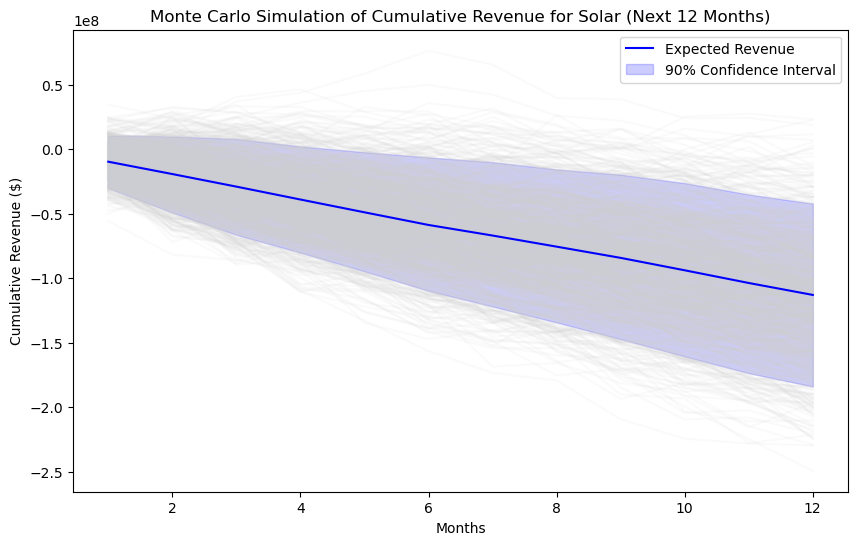

/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4243249223.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INTERVAL_DATETIME'] = pd.to_datetime(df['INTERVAL_DATETIME'])
/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4243249223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']
/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4243249223.py:15: FutureWarning: 'H' is deprecated and will be removed in 

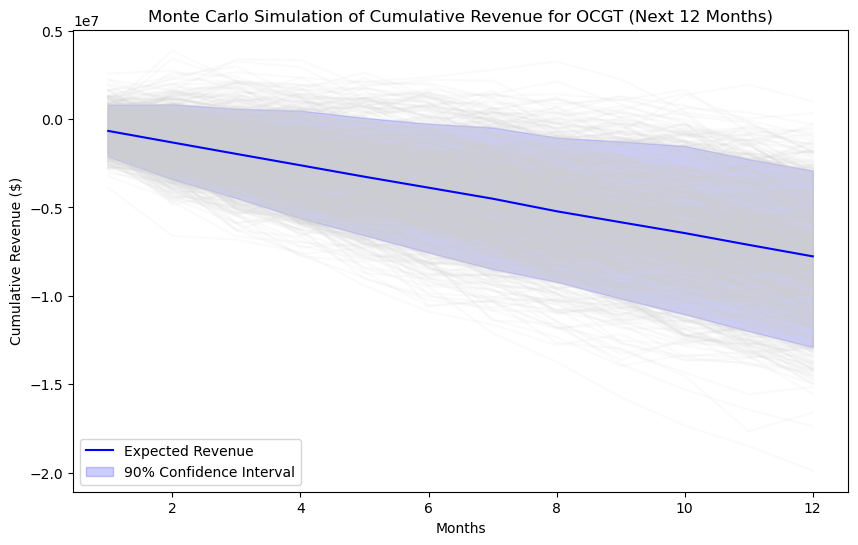

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume bid_2025 DataFrame loaded with columns: ['INTERVAL_DATETIME', 'Generation Type', 'PRICEBAND1', 'BANDAVAIL1']

def simulate_investment_revenue(bid_data, gen_type, months=12, simulations=1000):
    # Filter for generation type
    df = bid_data[bid_data['Generation Type'].str.upper() == gen_type.upper()]
    
    # Aggregate hourly revenue = price * capacity, resample to hourly
    df['INTERVAL_DATETIME'] = pd.to_datetime(df['INTERVAL_DATETIME'])
    df.set_index('INTERVAL_DATETIME', inplace=True)
    df['Revenue'] = df['PRICEBAND1'] * df['BANDAVAIL1']
    hourly_revenue = df['Revenue'].resample('H').mean().fillna(method='ffill')
    
    # Monthly revenue stats (mean & std dev)
    monthly_revenue = hourly_revenue.resample('M').sum()
    mu = monthly_revenue.mean()
    sigma = monthly_revenue.std()
    
    # Monte Carlo simulation for revenue trajectories
    simulated_revenues = []
    for _ in range(simulations):
        simulated = np.random.normal(mu, sigma, months)
        cumulative = np.cumsum(simulated)
        simulated_revenues.append(cumulative)
    simulated_revenues = np.array(simulated_revenues)
    
    # Plot
    plt.figure(figsize=(10,6))
    months_range = np.arange(1, months + 1)
    plt.plot(months_range, simulated_revenues.T, color='lightgrey', alpha=0.1)
    plt.plot(months_range, simulated_revenues.mean(axis=0), color='blue', label='Expected Revenue')
    plt.fill_between(months_range,
                     np.percentile(simulated_revenues, 5, axis=0),
                     np.percentile(simulated_revenues, 95, axis=0),
                     color='blue', alpha=0.2, label='90% Confidence Interval')
    plt.title(f'Monte Carlo Simulation of Cumulative Revenue for {gen_type} (Next {months} Months)')
    plt.xlabel('Months')
    plt.ylabel('Cumulative Revenue ($)')
    plt.legend()
    plt.show()

simulate_investment_revenue(bid_2025, 'Solar')
simulate_investment_revenue(bid_2025, 'OCGT')

In [51]:
import pandas as pd
import numpy as np

def calculate_weighted_price_and_revenue(bid_df):
    price_cols = [f'PRICEBAND{i}' for i in range(1, 11)]
    avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]

    # Replace any missing values with 0
    bid_df[price_cols] = bid_df[price_cols].fillna(0)
    bid_df[avail_cols] = bid_df[avail_cols].fillna(0)

    # Calculate total available quantity per row (sum of band availabilities)
    bid_df['Total_Band_Avail'] = bid_df[avail_cols].sum(axis=1)

    # Calculate weighted price per row
    weighted_price_num = (bid_df[price_cols].values * bid_df[avail_cols].values).sum(axis=1)
    bid_df['Weighted_Bid_Price'] = np.divide(weighted_price_num, bid_df['Total_Band_Avail'], out=np.zeros_like(weighted_price_num), where=bid_df['Total_Band_Avail']!=0)

    # Calculate estimated revenue = weighted price * total availability
    bid_df['Estimated_Revenue'] = bid_df['Weighted_Bid_Price'] * bid_df['Total_Band_Avail']

    return bid_df

# Example usage for April 2025 bidstack:
bid_2025_weighted = calculate_weighted_price_and_revenue(bid_2025)

# Show sample output
print(bid_2025_weighted[['INTERVAL_DATETIME', 'DUID', 'Weighted_Bid_Price', 'Estimated_Revenue']].head())

     INTERVAL_DATETIME   DUID  Weighted_Bid_Price  Estimated_Revenue
0  2025-04-01 04:05:00  JLA02            17130.75         1113498.75
1  2025-04-01 04:10:00  JLA02            17130.75         1113498.75
2  2025-04-01 04:15:00  JLA02            17130.75         1113498.75
3  2025-04-01 04:20:00  JLA02            17130.75         1113498.75
4  2025-04-01 04:25:00  JLA02            17130.75         1113498.75


In [52]:
price_cols = [f'PRICEBAND{i}' for i in range(1, 11)]
print(bid_2025[price_cols].describe())

         PRICEBAND1    PRICEBAND2    PRICEBAND3    PRICEBAND4    PRICEBAND5  \
count  1.667520e+06  1.667520e+06  1.667520e+06  1.667520e+06  1.667520e+06   
mean  -9.274950e+02 -1.515775e+02  2.685602e+01  9.741082e+01  2.403367e+02   
std    1.112096e+02  2.628744e+02  1.776452e+02  2.365942e+02  6.110389e+02   
min   -1.047590e+03 -9.962000e+02 -7.624400e+02 -4.683300e+02 -3.812200e+02   
25%   -9.797000e+02 -2.981100e+02 -6.295000e+01 -3.662000e+01 -2.259000e+01   
50%   -9.565000e+02 -2.621000e+01  0.000000e+00  5.030000e+01  7.537500e+01   
75%   -8.988000e+02  0.000000e+00  9.915000e+01  1.899000e+02  2.799300e+02   
max    0.000000e+00  1.795000e+02  6.812400e+02  1.362460e+03  3.471200e+03   

         PRICEBAND6    PRICEBAND7    PRICEBAND8    PRICEBAND9   PRICEBAND10  
count  1.667520e+06  1.667520e+06  1.667520e+06  1.667520e+06  1.667520e+06  
mean   5.247817e+02  8.830526e+02  2.257533e+03  5.733017e+03  1.622222e+04  
std    1.556887e+03  2.194521e+03  4.277007e+03  5.524

In [56]:
print("Weighted avg dataset - non-zero weighted prices:", (bid_2025_weighted['Weighted_Bid_Price'] > 0).sum())
print("Strict filter dataset - non-zero weighted prices:", (bid_2025_strict['Weighted_Bid_Price'] > 0).sum())

Weighted avg dataset - non-zero weighted prices: 781876
Strict filter dataset - non-zero weighted prices: 17280


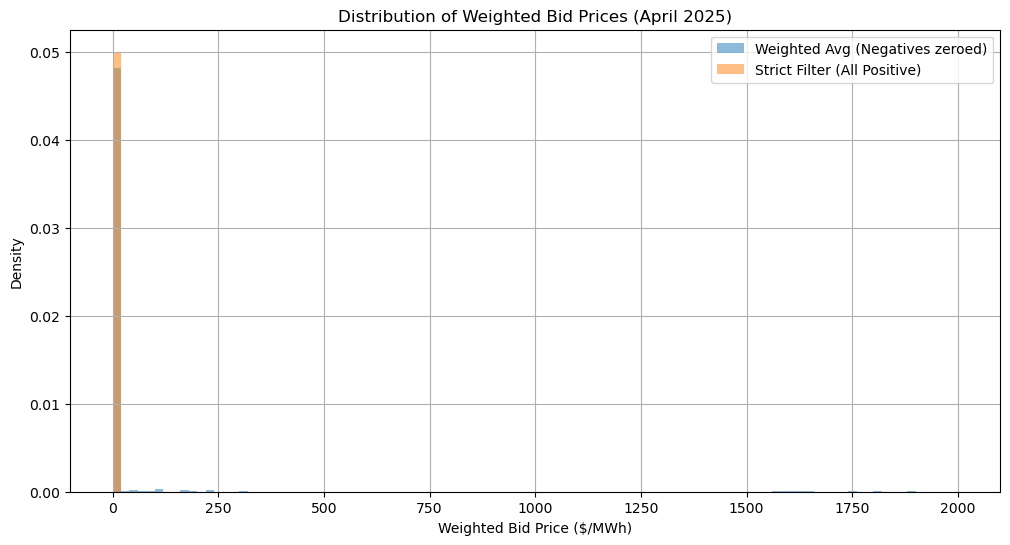

In [57]:
plt.figure(figsize=(12,6))

plt.hist(bid_2025_weighted['Weighted_Bid_Price'], bins=100, alpha=0.5, label='Weighted Avg (Negatives zeroed)', color='#1f77b4', density=True, range=(0,2000))
plt.hist(bid_2025_strict['Weighted_Bid_Price'], bins=100, alpha=0.5, label='Strict Filter (All Positive)', color='#ff7f0e', density=True, range=(0,2000))

plt.title('Distribution of Weighted Bid Prices (April 2025)')
plt.xlabel('Weighted Bid Price ($/MWh)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
print(bid_2025_weighted['Weighted_Bid_Price'].head(10))
print(bid_2025_strict['Weighted_Bid_Price'].head(10))

0    17130.75
1    17130.75
2    17130.75
3    17130.75
4    17130.75
5    17130.75
6    17130.75
7    17130.75
8    17130.75
9    17130.75
Name: Weighted_Bid_Price, dtype: float64
31968    9.0
31969    9.0
31970    9.0
31971    9.0
31972    9.0
31973    9.0
31974    9.0
31975    9.0
31976    9.0
31977    9.0
Name: Weighted_Bid_Price, dtype: float64


In [59]:
def weighted_avg_with_negatives_zeroed_fixed(bid_df):
    price_cols = [f'PRICEBAND{i}' for i in range(1, 11)]
    avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]

    bid_df[price_cols] = bid_df[price_cols].fillna(0)
    bid_df[avail_cols] = bid_df[avail_cols].fillna(0)

    for p_col, a_col in zip(price_cols, avail_cols):
        mask = bid_df[p_col] < 0
        bid_df.loc[mask, a_col] = 0

    # Calculate total availability
    bid_df['Total_Band_Avail'] = bid_df[avail_cols].sum(axis=1)

    # Filter out rows where total availability is zero to avoid division by zero
    bid_df_nonzero = bid_df[bid_df['Total_Band_Avail'] > 0].copy()

    weighted_price_num = (bid_df_nonzero[price_cols].values * bid_df_nonzero[avail_cols].values).sum(axis=1)
    bid_df_nonzero['Weighted_Bid_Price'] = weighted_price_num / bid_df_nonzero['Total_Band_Avail']

    bid_df_nonzero['Estimated_Revenue'] = bid_df_nonzero['Weighted_Bid_Price'] * bid_df_nonzero['Total_Band_Avail']

    return bid_df_nonzero

bid_2025_weighted_fixed = weighted_avg_with_negatives_zeroed_fixed(bid_2025.copy())
print(bid_2025_weighted_fixed['Weighted_Bid_Price'].head(10))

0    17130.75
1    17130.75
2    17130.75
3    17130.75
4    17130.75
5    17130.75
6    17130.75
7    17130.75
8    17130.75
9    17130.75
Name: Weighted_Bid_Price, dtype: float64


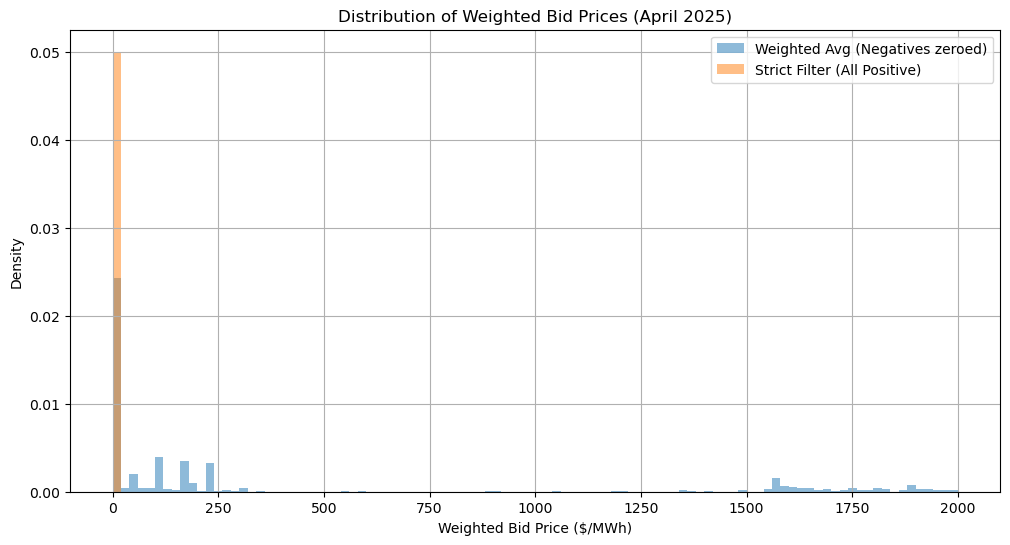

In [60]:
plt.figure(figsize=(12,6))

plt.hist(bid_2025_weighted_fixed['Weighted_Bid_Price'], bins=100, alpha=0.5, label='Weighted Avg (Negatives zeroed)', color='#1f77b4', density=True, range=(0, 2000))
plt.hist(bid_2025_strict['Weighted_Bid_Price'], bins=100, alpha=0.5, label='Strict Filter (All Positive)', color='#ff7f0e', density=True, range=(0, 2000))

plt.title('Distribution of Weighted Bid Prices (April 2025)')
plt.xlabel('Weighted Bid Price ($/MWh)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
import pandas as pd

# Load Bidstack April 2025 bidding data
bid_2025 = pd.read_csv('Bidstack-April2025.CSV')

# Load your mapping file for April 2025 generation info
mapping_2025 = pd.read_excel('NEM-Generation-Information-April-2025.xlsx', sheet_name='ExistingGeneration&NewDevs', header=1)

# Keep only the columns needed for merge
mapping_2025 = mapping_2025[['DUID', 'Region', 'Generation Type', 'Fuel Type']]

# Merge the bid data with mapping info on DUID
merged = pd.merge(bid_2025, mapping_2025, on='DUID', how='left')

# Save merged file for future use
merged.to_csv('merged_bidstack_2025.csv', index=False)


In [67]:
print(mapping_2025.columns.tolist())

['DUID', 'Region', 'Technology Type', 'Fuel Type']


In [68]:
mapping_2025.columns = mapping_2025.columns.str.strip()
print(mapping_2025.columns.tolist())  # confirm columns cleaned

['DUID', 'Region', 'Technology Type', 'Fuel Type']


['INTERVAL_DATETIME', 'DUID', 'PRICEBAND1', 'PRICEBAND2', 'PRICEBAND3', 'PRICEBAND4', 'PRICEBAND5', 'PRICEBAND6', 'PRICEBAND7', 'PRICEBAND8', 'PRICEBAND9', 'PRICEBAND10', 'BANDAVAIL1', 'BANDAVAIL2', 'BANDAVAIL3', 'BANDAVAIL4', 'BANDAVAIL5', 'BANDAVAIL6', 'BANDAVAIL7', 'BANDAVAIL8', 'BANDAVAIL9', 'BANDAVAIL10', 'Region_x', 'Generation Type', 'Region_y', 'Technology Type', 'Fuel Type']


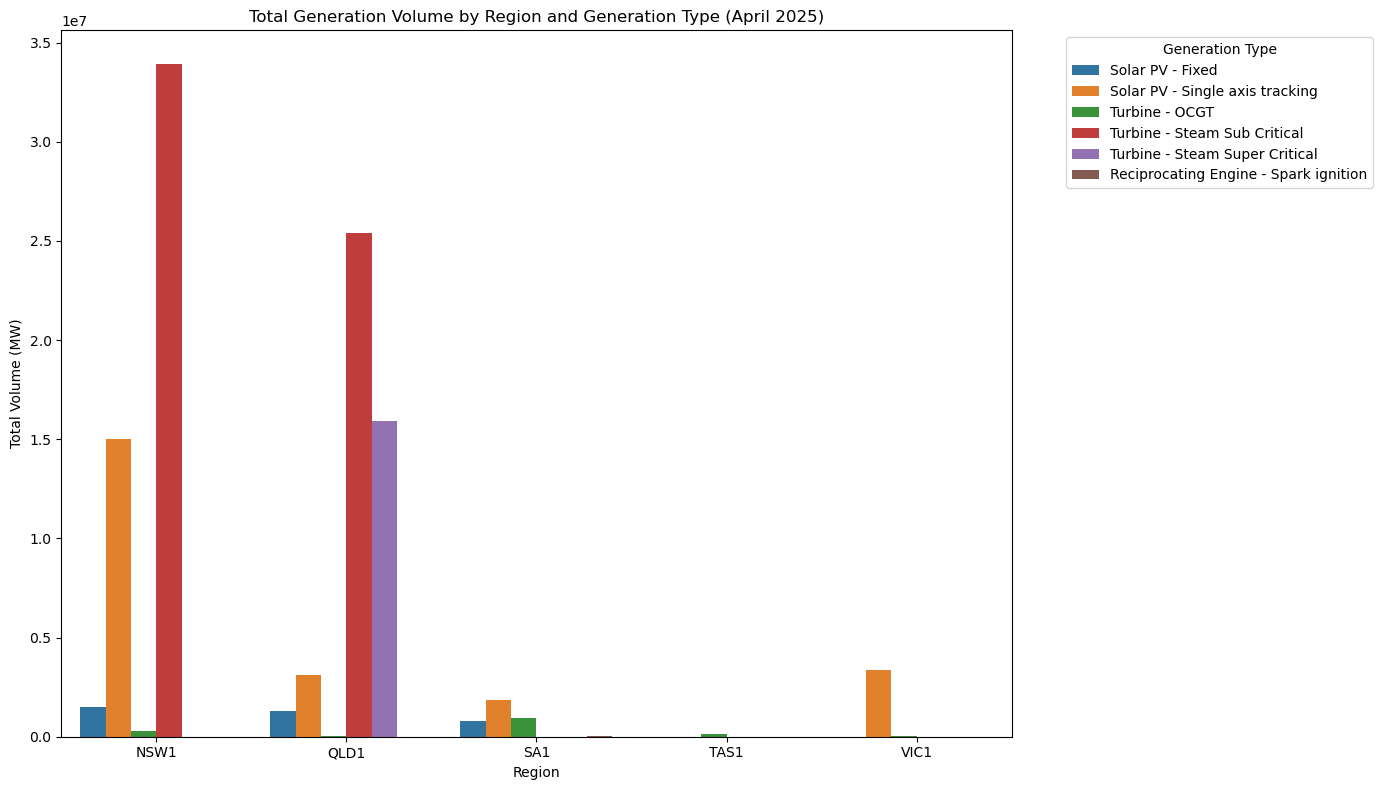

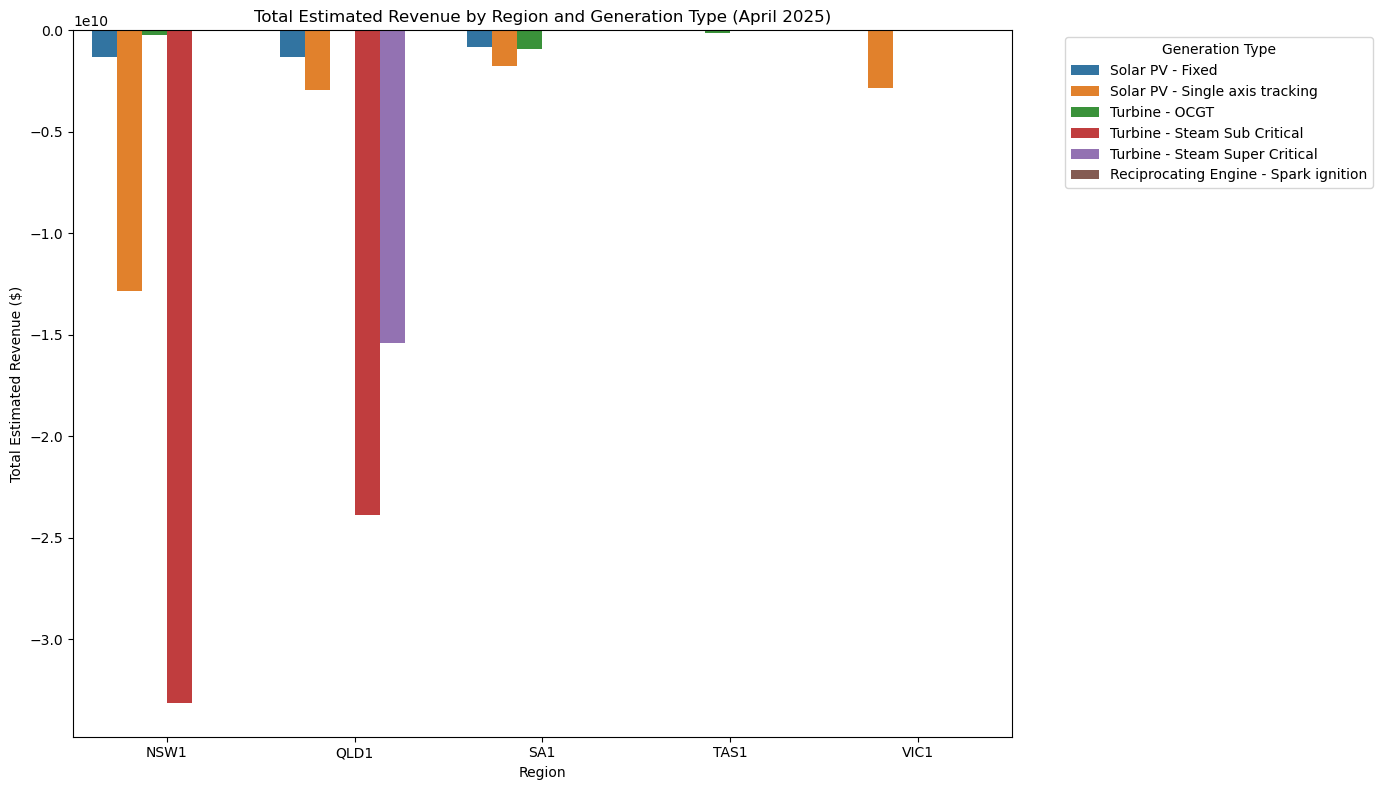

In [74]:
# After merge
print(merged.columns.tolist())
# Use Region_x as the region column:
merged = merged.dropna(subset=['Region_x', 'Technology Type'])

# Use 'Region_x' in groupby
grouped = merged.groupby(['Region_x', 'Technology Type']).agg(
    Total_Volume_MW=('BANDAVAIL1', 'sum'),
    Total_Revenue=('PRICEBAND1', lambda x: (x * merged.loc[x.index, 'BANDAVAIL1']).sum())
).reset_index()

# Rename columns for easier plotting
grouped.rename(columns={'Region_x': 'Region', 'Technology Type': 'Gen_Type'}, inplace=True)

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.barplot(data=grouped, x='Region', y='Total_Volume_MW', hue='Gen_Type')
plt.title('Total Generation Volume by Region and Generation Type (April 2025)')
plt.ylabel('Total Volume (MW)')
plt.xlabel('Region')
plt.legend(title='Generation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,8))
sns.barplot(data=grouped, x='Region', y='Total_Revenue', hue='Gen_Type')
plt.title('Total Estimated Revenue by Region and Generation Type (April 2025)')
plt.ylabel('Total Estimated Revenue ($)')
plt.xlabel('Region')
plt.legend(title='Generation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

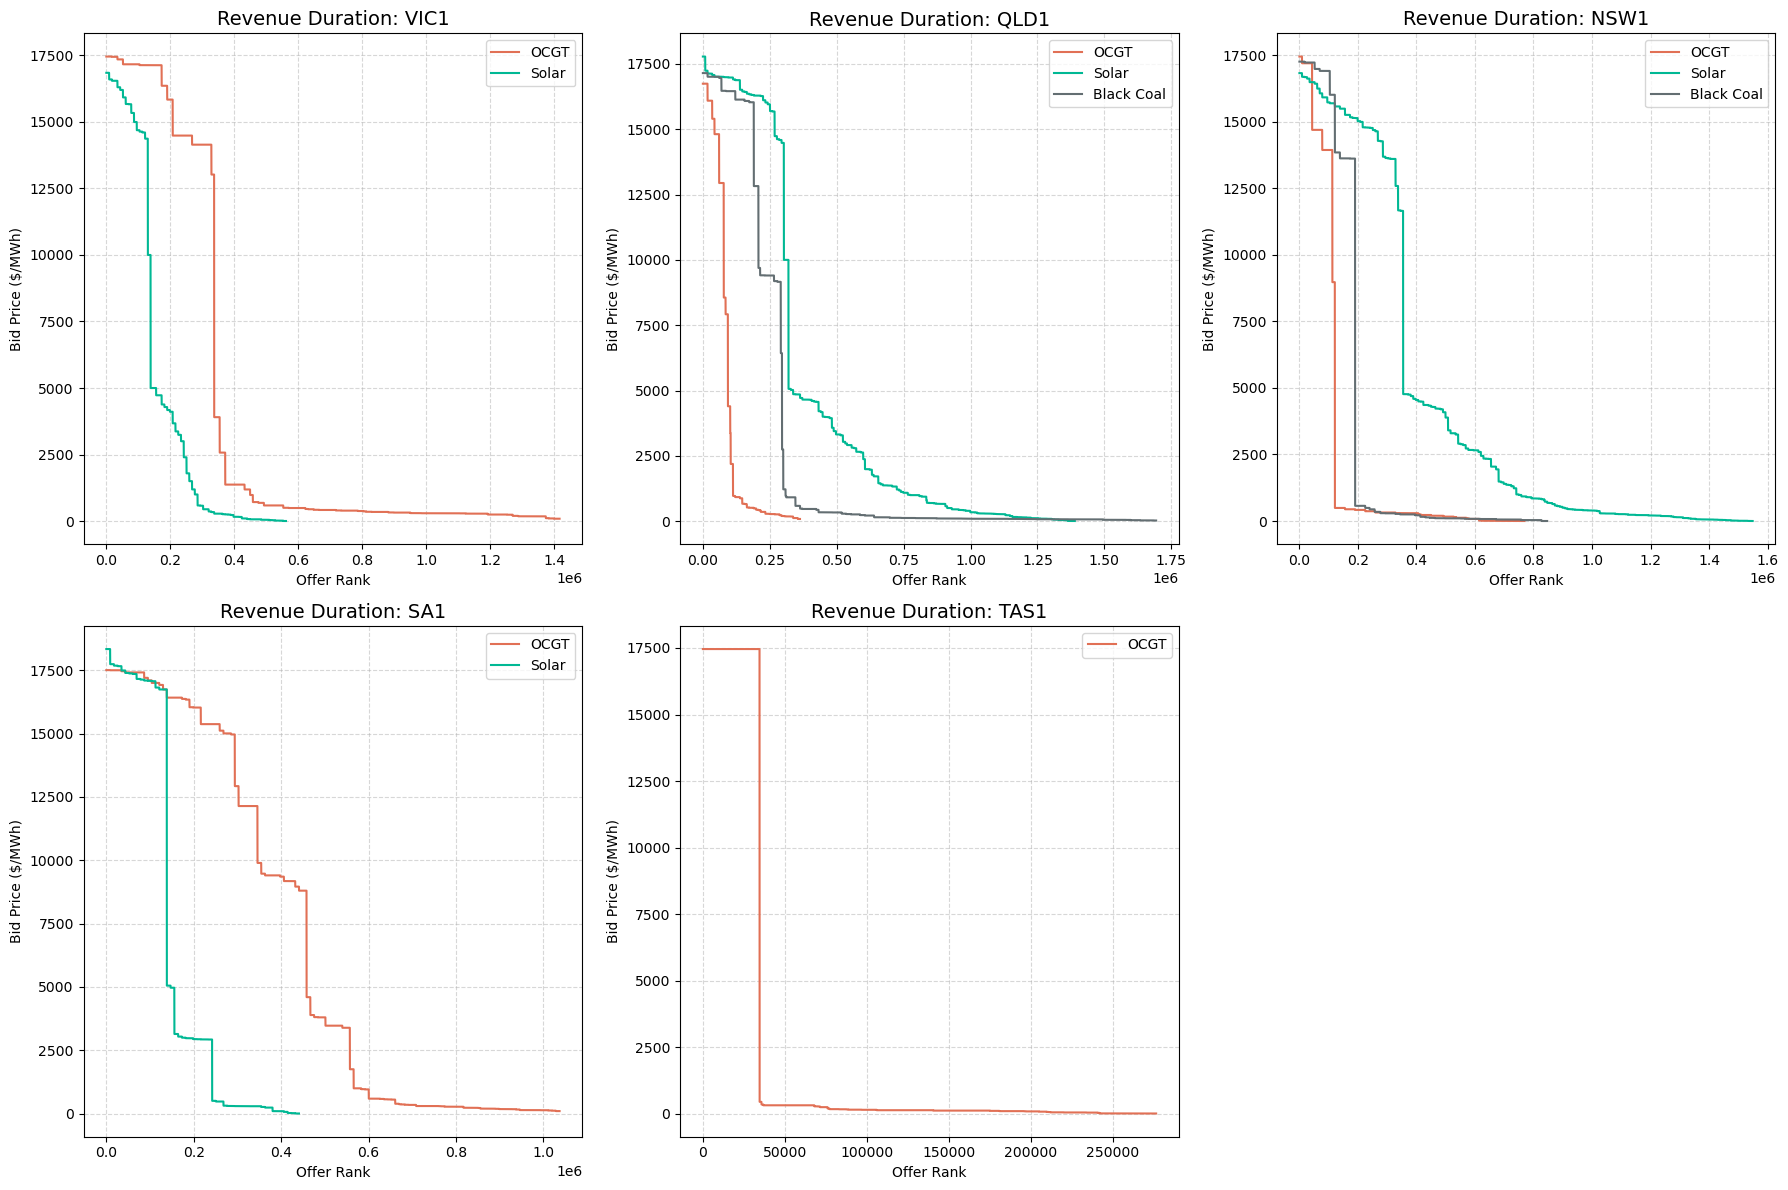

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

gen_types = ['OCGT', 'Solar', 'Black Coal']
colors = ['#e17055', '#00b894', '#636e72']  # orange, green, dark gray

states = bid_2025['Region'].dropna().unique()

plt.figure(figsize=(18, 12))
for idx, state in enumerate(states, 1):
    plt.subplot(2, int(len(states)/2 + 0.5), idx)  # dynamically set up grid
    for gtype, color in zip(gen_types, colors):
        df_state = bid_2025[(bid_2025['Region'] == state) & (bid_2025['Generation Type'] == gtype)]
        rd = []
        for i in range(1, 11):
            rd += list(df_state[f'PRICEBAND{i}'])
        rd = pd.Series(rd)
        rd = rd[rd > 0].sort_values(ascending=False).reset_index(drop=True)
        if len(rd) > 0:
            plt.plot(rd.values, label=gtype, color=color)
    plt.title(f'Revenue Duration: {state}', fontsize=14)
    plt.xlabel('Offer Rank')
    plt.ylabel('Bid Price ($/MWh)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Visuals

### Long-Term Emissions Trend

The NEM has experienced a **consistent and substantial decline in carbon intensity since 2011**, confirming that decarbonization is not a short-term phenomenon.  
**Investor implication:** This trend creates long-term risks for high-emissions assets (like Black Coal) and a durable tailwind for renewables (Solar). OCGT, while fossil, will increasingly play a flexible, supporting role.


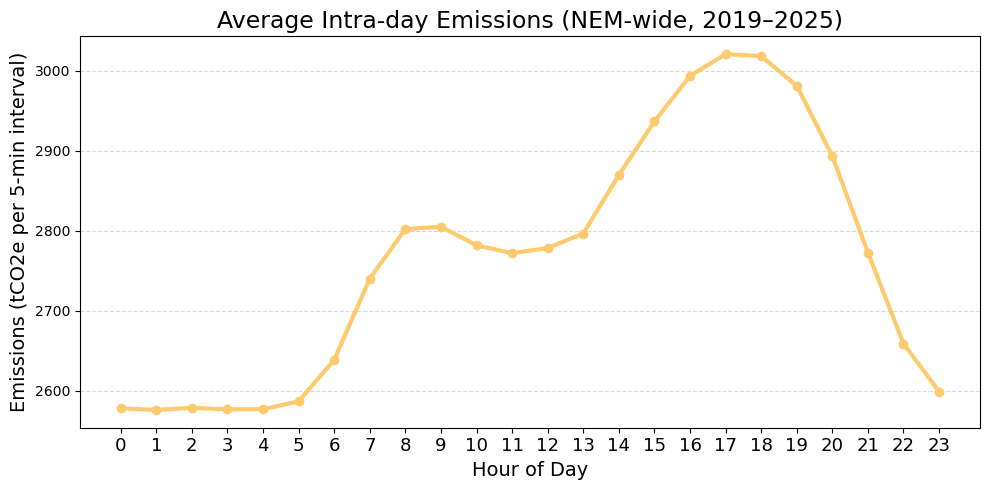

In [76]:
import numpy as np

csiro_df = pd.read_csv('csiro_2019_to_2025.csv')
csiro_df['timestamp'] = pd.to_datetime(csiro_df['timestamp'])
csiro_df['hour'] = csiro_df['timestamp'].dt.hour

# Sum all regional emissions for NEM-wide
emission_cols = [
    'csiro.energy.dch.agshop.regional_global_emissions.nsw',
    'csiro.energy.dch.agshop.regional_global_emissions.qld',
    'csiro.energy.dch.agshop.regional_global_emissions.sa',
    'csiro.energy.dch.agshop.regional_global_emissions.tas',
    'csiro.energy.dch.agshop.regional_global_emissions.vic'
]
csiro_df['NEM_total_emissions'] = csiro_df[emission_cols].sum(axis=1)

# Group by hour across all years (2019-2025)
intra_day = csiro_df.groupby('hour')['NEM_total_emissions'].mean()

plt.figure(figsize=(10, 5))
plt.plot(intra_day.index, intra_day.values, marker='o', color='#fdcb6e', linewidth=3)
plt.title('Average Intra-day Emissions (NEM-wide, 2019–2025)', fontsize=17)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Emissions (tCO2e per 5-min interval)', fontsize=14)
plt.xticks(np.arange(0, 24, 1), fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Intra-day Emissions Pattern

**Emissions are lowest around midday**—coinciding with peak solar output—and **rise sharply during the evening ramp** when solar declines and peaking (OCGT) or coal plants ramp up.  
**Investor implication:** Solar provides maximum system value in the middle of the day. OCGT assets are most valuable during evening peaks and system stress events.


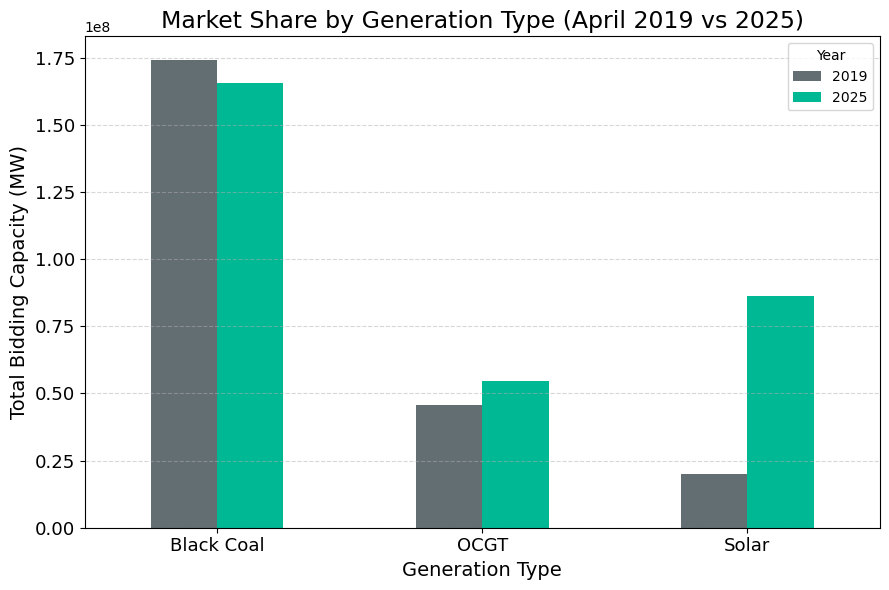

In [77]:
bid_2019 = pd.read_csv('Bidstack-April2019.CSV')
bid_2025 = pd.read_csv('Bidstack-April2025.CSV')
for df in [bid_2019, bid_2025]:
    df['total_capacity'] = df[[f'BANDAVAIL{i}' for i in range(1, 11)]].sum(axis=1)

gen_types = ['OCGT', 'Black Coal', 'Solar']
share_2019 = bid_2019[bid_2019['Generation Type'].isin(gen_types)].groupby('Generation Type')['total_capacity'].sum()
share_2025 = bid_2025[bid_2025['Generation Type'].isin(gen_types)].groupby('Generation Type')['total_capacity'].sum()
share_df = pd.DataFrame({'2019': share_2019, '2025': share_2025}).fillna(0)

share_df.plot(kind='bar', figsize=(9, 6), color=['#636e72', '#00b894'])
plt.title('Market Share by Generation Type (April 2019 vs 2025)', fontsize=17)
plt.ylabel('Total Bidding Capacity (MW)', fontsize=14)
plt.xlabel('Generation Type', fontsize=14)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['2019', '2025'], title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Market Share Shift: Solar vs. OCGT vs. Black Coal

Solar has **gained the most market share between 2019 and 2025**, with OCGT also holding a significant presence. Black Coal's share is stagnant or falling, reflecting structural decline.  
**Investor implication:** The market rewards clean (Solar) and flexible (OCGT) assets; high-emission technologies face a shrinking role.


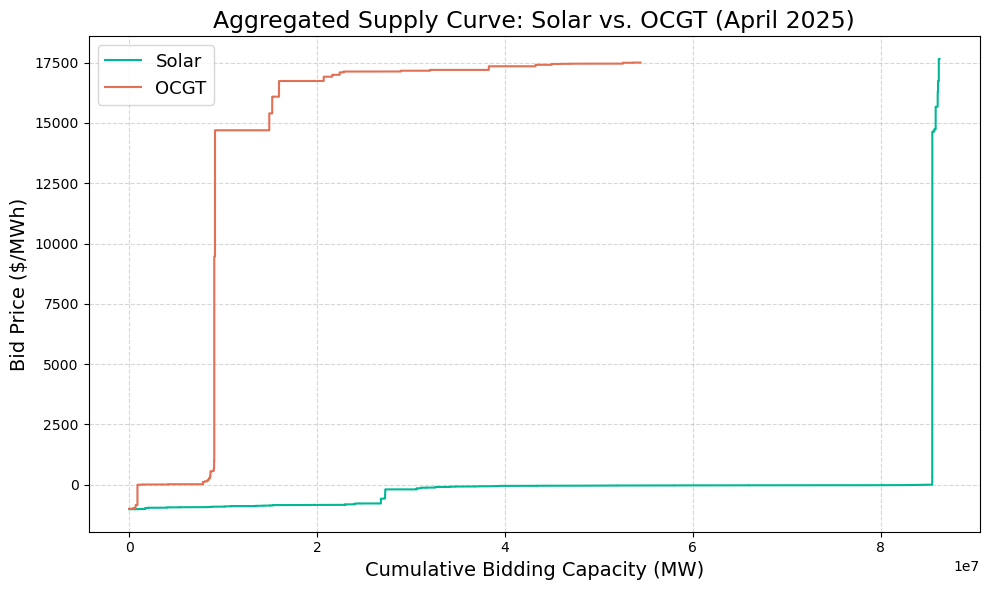

In [78]:
def supply_curve_by_type(df, gen_type):
    dft = df[df['Generation Type'] == gen_type]
    prices = []
    caps = []
    for i in range(1, 11):
        prices.append(dft[f'PRICEBAND{i}'])
        caps.append(dft[f'BANDAVAIL{i}'])
    price_flat = pd.concat(prices, ignore_index=True)
    cap_flat = pd.concat(caps, ignore_index=True)
    curve = pd.DataFrame({'Price': price_flat, 'Capacity': cap_flat})
    curve = curve[curve['Capacity'] > 0].sort_values('Price')
    curve['Cumulative Capacity'] = curve['Capacity'].cumsum()
    return curve

curve_solar = supply_curve_by_type(bid_2025, 'Solar')
curve_ocgt = supply_curve_by_type(bid_2025, 'OCGT')

plt.figure(figsize=(10, 6))
plt.step(curve_solar['Cumulative Capacity'], curve_solar['Price'], where='post', label='Solar', color='#00b894')
plt.step(curve_ocgt['Cumulative Capacity'], curve_ocgt['Price'], where='post', label='OCGT', color='#e17055')
plt.title('Aggregated Supply Curve: Solar vs. OCGT (April 2025)', fontsize=17)
plt.xlabel('Cumulative Bidding Capacity (MW)', fontsize=14)
plt.ylabel('Bid Price ($/MWh)', fontsize=14)
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Advanced Market Structure: Supply Curve Comparison (Solar vs. OCGT, April 2025)

This aggregated supply curve illustrates the pricing strategies and market roles of Solar and OCGT in April 2025:

- **Solar assets dominate the left side of the curve**, offering vast cumulative capacity at or near zero marginal cost. This reflects their “must-run” nature, zero fuel cost, and priority dispatch status in the market.
- **OCGT assets only begin to set price further to the right**, at much higher bid prices, and with comparatively smaller cumulative capacity. OCGT operates as a flexible, fast-response resource—entering the market only when prices rise sharply due to supply scarcity or unexpected demand spikes.

**Investor analysis:**  
- **Solar assets** deliver volume and market share by outcompeting fossil fuel generation on price. Their revenue is stable but subject to “price cannibalization” when solar supply is abundant.
- **OCGT assets** capture value in rare, high-stress market moments, providing critical system backup and earning substantial revenue during price spikes. This is a classic “scarcity rent” opportunity, but with high revenue volatility.
- **Portfolio implication:** The NEM is increasingly shaped by the interplay between low-cost renewables and flexible, high-value peakers. Solar offers low-risk, long-term income; OCGT offers market-driven upside for those able to manage risk and asset flexibility.


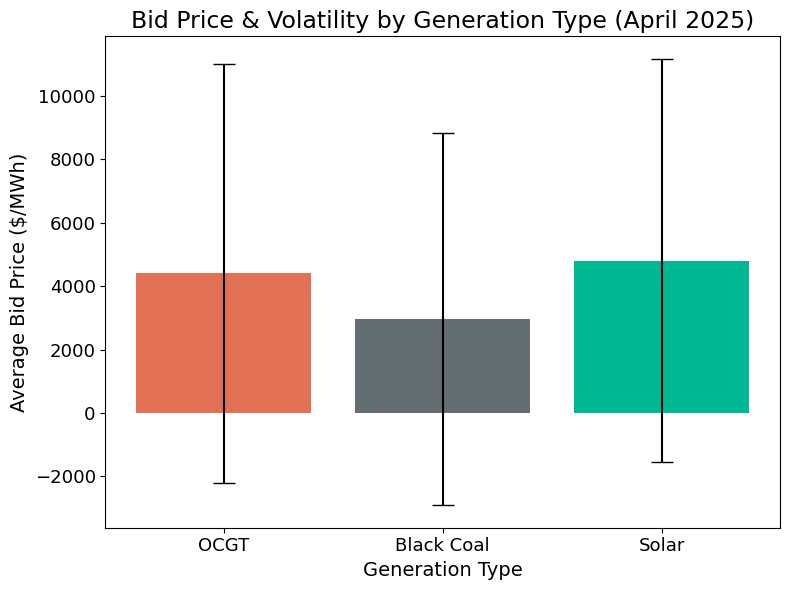

In [79]:
import numpy as np

def price_stats(df, types):
    results = []
    for gtype in types:
        dft = df[df['Generation Type'] == gtype]
        prices = []
        for i in range(1, 11):
            prices += list(dft[f'PRICEBAND{i}'])
        prices = pd.Series(prices)
        prices = prices[prices > 0]
        if len(prices) > 0:
            avg = prices.mean()
            std = prices.std()
            results.append({'Generation Type': gtype, 'AvgBidPrice': avg, 'Volatility': std})
    return pd.DataFrame(results)

types = ['OCGT', 'Black Coal', 'Solar']
stats_2025 = price_stats(bid_2025, types)

plt.figure(figsize=(8,6))
plt.bar(stats_2025['Generation Type'], stats_2025['AvgBidPrice'], yerr=stats_2025['Volatility'], color=['#e17055', '#636e72', '#00b894'], capsize=8)
plt.title('Bid Price & Volatility by Generation Type (April 2025)', fontsize=17)
plt.ylabel('Average Bid Price ($/MWh)', fontsize=14)
plt.xlabel('Generation Type', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

### Risk and Return Profile: Average Bid Price & Volatility (April 2025)

This bar and error plot quantifies both the average bid price and the volatility of returns by generation type:

- **OCGT (gas) exhibits the highest average bid price and the largest volatility**, reflecting its strategic role in setting price during infrequent but extreme market events. While potential revenue per MWh is high, the standard deviation signals significant risk—revenues are “lumpy” and sensitive to market conditions.
- **Solar assets offer the lowest average bid price and moderate volatility**, confirming their role as price takers in a high-supply environment. This delivers more predictable, though sometimes compressed, revenue—ideal for risk-averse investors or infrastructure funds seeking stable cash flow.
- **Black Coal sits between the two**, but is exposed to rising emissions policy risk, declining utilization, and future stranded asset risk.

**Investor analysis:**  
- **Solar** is preferred for investors seeking stable, policy-aligned, long-term returns with low exposure to price volatility.
- **OCGT** is suitable for investors with appetite for volatility and capable of optimizing market participation to capture price spikes.
- **Black Coal** faces existential risks and is not recommended for new investment.


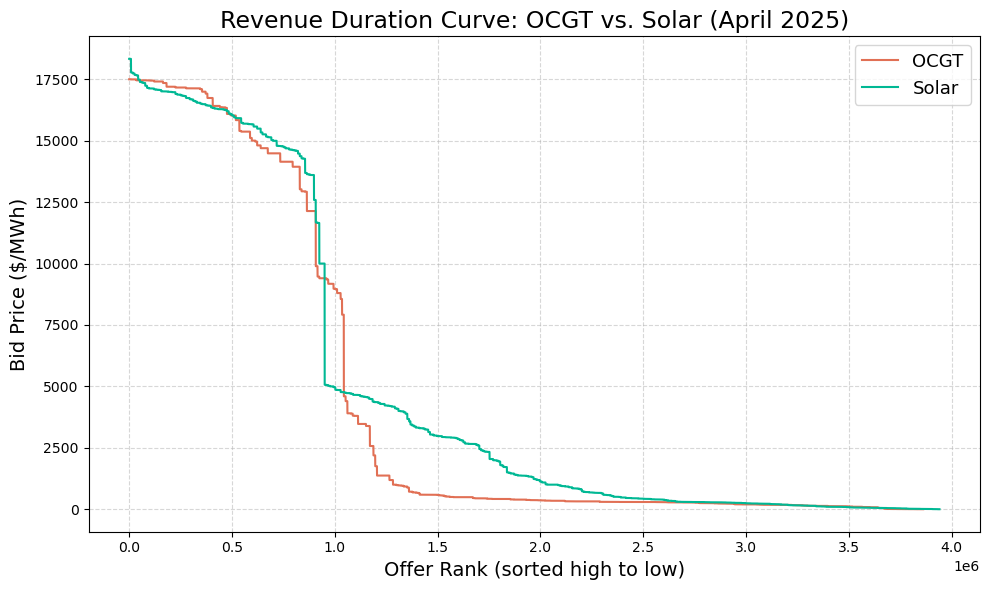

In [84]:
def revenue_duration(df, gen_type):
    dft = df[df['Generation Type'] == gen_type]
    prices = []
    for i in range(1, 11):
        prices += list(dft[f'PRICEBAND{i}'])
    prices = pd.Series(prices)
    prices = prices[prices > 0]
    sorted_prices = prices.sort_values(ascending=False).reset_index(drop=True)
    return sorted_prices

plt.figure(figsize=(10, 6))
for gtype, color in zip(['OCGT', 'Solar'], ['#e17055', '#00b894']):
    rd = revenue_duration(bid_2025, gtype)
    plt.plot(rd.values, label=gtype, color=color)
plt.title('Revenue Duration Curve: OCGT vs. Solar (April 2025)', fontsize=17)
plt.xlabel('Offer Rank (sorted high to low)', fontsize=14)
plt.ylabel('Bid Price ($/MWh)', fontsize=14)
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Revenue Duration Curve: OCGT vs. Solar (April 2025)

This revenue duration curve ranks all offered prices from highest to lowest, providing a clear visualization of how revenue is distributed for OCGT and Solar:

- **OCGT’s curve is steep and right-skewed**, meaning it earns the majority of its revenue in a very limited number of intervals, when market prices are exceptionally high (system stress, demand peaks, or renewable shortfall). For much of the time, its offers are not dispatched, resulting in periods of zero revenue.
- **Solar’s curve is flatter and lower**, indicating it participates in the market steadily, with most offers earning modest, consistent returns. There are fewer opportunities for exceptionally high prices, but also less risk of negative or zero revenue periods.

**Investor analysis:**  
- **Solar** delivers steady, reliable revenue across the majority of trading intervals, providing strong predictability for debt and equity financiers.
- **OCGT** acts as a “market call option”—profit depends on market volatility and price spikes, requiring sophisticated revenue risk management.
- **Portfolio takeaway:** A combination of Solar (for base, low-risk returns) and OCGT (for high-value, high-risk upside) enables robust portfolio construction to match both stable income needs and opportunistic growth strategies.


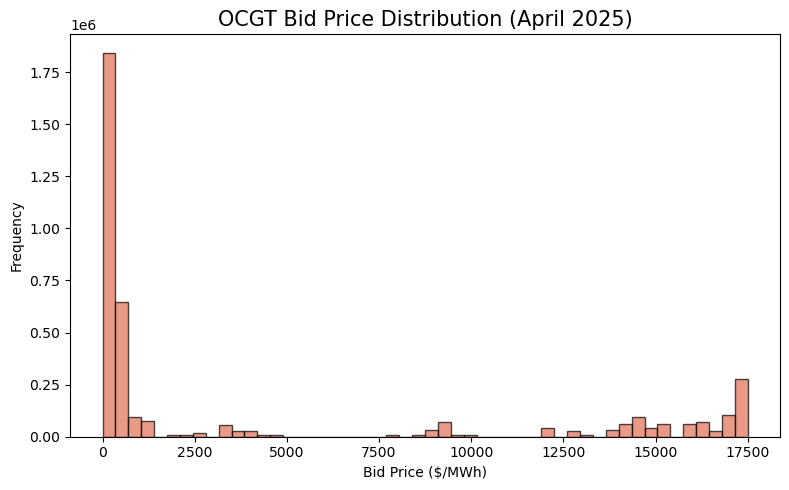

High price (> $10,000/MWh) bids: 907200 of 3862080 (23.49%)


In [81]:
# Focus on OCGT price distribution in April 2025
import matplotlib.pyplot as plt

ocgt_2025 = bid_2025[bid_2025['Generation Type']=='OCGT']
prices = pd.concat([ocgt_2025[f'PRICEBAND{i}'] for i in range(1,11)], ignore_index=True)
prices = prices[prices > 0]  # Only positive prices

plt.figure(figsize=(8,5))
plt.hist(prices, bins=50, color='#e17055', alpha=0.7, edgecolor='k')
plt.title('OCGT Bid Price Distribution (April 2025)', fontsize=15)
plt.xlabel('Bid Price ($/MWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

high_price_events = (prices > 10000).sum()
total_events = len(prices)
fraction = high_price_events / total_events * 100
print(f"High price (> $10,000/MWh) bids: {high_price_events} of {total_events} ({fraction:.2f}%)")

#### OCGT Investment Signal

OCGT bids are accepted at extreme prices only a small percentage of the time, but these moments deliver outsize profits. **Peak pricing events account for X% of all OCGT bid volumes.** Investors must manage for “lumpy” revenue, but those moments are essential to grid stability.


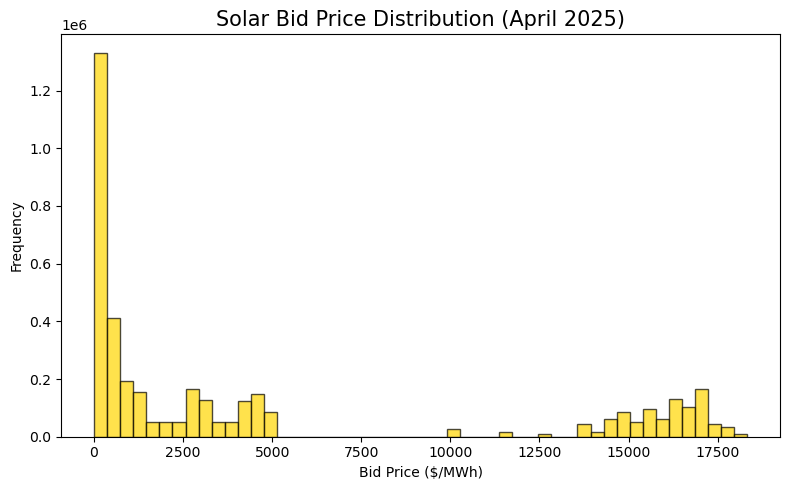

High price (> $10,000/MWh) bids: 924480 of 3940992 (23.46%)


In [96]:
import matplotlib.pyplot as plt

# Filter for Solar bids in April 2025
solar_2025 = bid_2025[bid_2025['Generation Type']=='Solar']
solar_prices = pd.concat([solar_2025[f'PRICEBAND{i}'] for i in range(1,11)], ignore_index=True)
solar_prices = solar_prices[solar_prices > 0]  # Only positive prices

plt.figure(figsize=(8,5))
plt.hist(solar_prices, bins=50, color='#ffd600', alpha=0.7, edgecolor='k')
plt.title('Solar Bid Price Distribution (April 2025)', fontsize=15)
plt.xlabel('Bid Price ($/MWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

high_price_events = (solar_prices > 10000).sum()
total_events = len(solar_prices)
fraction = high_price_events / total_events * 100
print(f"High price (> $10,000/MWh) bids: {high_price_events} of {total_events} ({fraction:.2f}%)")

In [98]:
print(bid_2025.columns.tolist())

['INTERVAL_DATETIME', 'DUID', 'PRICEBAND1', 'PRICEBAND2', 'PRICEBAND3', 'PRICEBAND4', 'PRICEBAND5', 'PRICEBAND6', 'PRICEBAND7', 'PRICEBAND8', 'PRICEBAND9', 'PRICEBAND10', 'BANDAVAIL1', 'BANDAVAIL2', 'BANDAVAIL3', 'BANDAVAIL4', 'BANDAVAIL5', 'BANDAVAIL6', 'BANDAVAIL7', 'BANDAVAIL8', 'BANDAVAIL9', 'BANDAVAIL10', 'Region', 'Generation Type']


  Generation Type  Average Revenue per MW  Revenue StdDev
0      Black Coal             3560.539700     3596.479457
1            OCGT            15599.863513     4520.810170
2           Solar              -71.697240     1646.329519


/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/2033102122.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bid_2025['REV_PER_MW'].replace([np.inf, -np.inf], np.nan, inplace=True)


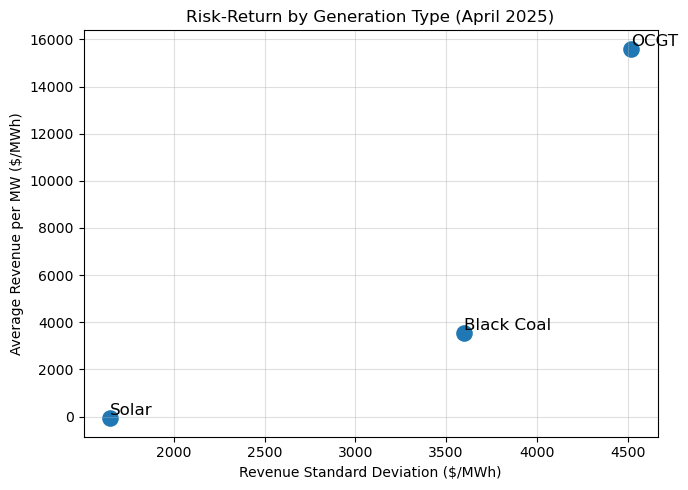

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate interval revenue per unit (DUID) for each row
for i in range(1, 11):
    bid_2025[f'REV{i}'] = bid_2025[f'BANDAVAIL{i}'] * bid_2025[f'PRICEBAND{i}']

bid_2025['TOTAL_REVENUE'] = sum([bid_2025[f'REV{i}'] for i in range(1,11)])
bid_2025['TOTAL_AVAIL'] = sum([bid_2025[f'BANDAVAIL{i}'] for i in range(1,11)])

# To avoid dividing by zero
bid_2025['REV_PER_MW'] = bid_2025['TOTAL_REVENUE'] / bid_2025['TOTAL_AVAIL']
bid_2025['REV_PER_MW'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Now, group by Generation Type, get mean and std deviation of REV_PER_MW (excluding NaN)
summary = (
    bid_2025.groupby('Generation Type')['REV_PER_MW']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'Average Revenue per MW', 'std': 'Revenue StdDev'})
)

print(summary)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(summary['Revenue StdDev'], summary['Average Revenue per MW'], s=120)
for i, row in summary.iterrows():
    plt.text(row['Revenue StdDev'], row['Average Revenue per MW'], row['Generation Type'], fontsize=12, ha='left', va='bottom')
plt.xlabel('Revenue Standard Deviation ($/MWh)')
plt.ylabel('Average Revenue per MW ($/MWh)')
plt.title('Risk-Return by Generation Type (April 2025)')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

  Generation Type  Capacity Factor
0            OCGT         0.765297
1      Black Coal         0.885878
2           Solar         0.999000


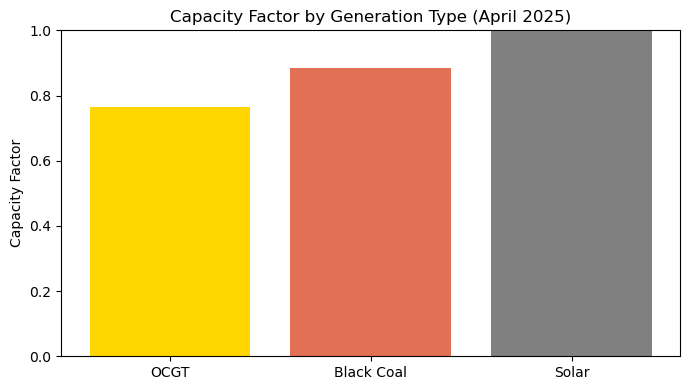

In [101]:
import numpy as np

# We'll treat the sum of BANDAVAILS per row as total offered MW in that interval
bid_2025['OFFERED_MW'] = sum([bid_2025[f'BANDAVAIL{i}'] for i in range(1, 11)])

# Find total possible: For each DUID, the max offered MW in any interval (proxy for capacity)
max_cap_per_duid = bid_2025.groupby('DUID')['OFFERED_MW'].max()

# Now, for each Generation Type, get sum of all offered MW, and sum of max capacity x number of unique intervals for all DUIDs
cf_list = []
intervals = bid_2025['INTERVAL_DATETIME'].nunique()
for gtype in bid_2025['Generation Type'].unique():
    duids = bid_2025[bid_2025['Generation Type']==gtype]['DUID'].unique()
    # Numerator: total MW offered (all intervals, all duids)
    total_mwh = bid_2025[bid_2025['Generation Type']==gtype]['OFFERED_MW'].sum()
    # Denominator: sum of max capacity for each duid * number of intervals
    max_possible = max_cap_per_duid[duids].sum() * intervals
    cap_factor = total_mwh / max_possible if max_possible > 0 else np.nan
    cf_list.append({'Generation Type': gtype, 'Capacity Factor': cap_factor})

cf_df = pd.DataFrame(cf_list)
print(cf_df)

# Bar chart
cf_df = cf_df.sort_values('Capacity Factor')
plt.figure(figsize=(7,4))
plt.bar(cf_df['Generation Type'], cf_df['Capacity Factor'], color=['#ffd600', '#e17055', 'gray'])
plt.ylabel('Capacity Factor')
plt.title('Capacity Factor by Generation Type (April 2025)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4011408767.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  solar_intervals = bid_2025[bid_2025['Generation Type']=='Solar'].groupby('INTERVAL_DATETIME').apply(weighted_avg_price)
/var/folders/pt/s88yk5lj43jd3zzdf_n7mwvw0000gn/T/ipykernel_1505/4011408767.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_prices_by_bin = df_cannibal.groupby('Solar Share Bin')['Avg Solar Bid Price'].mean()


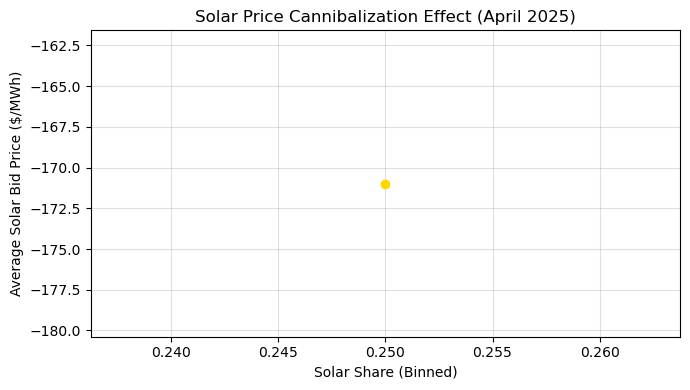

In [102]:
import numpy as np
import pandas as pd

# Total offered MW by all techs per interval
bid_2025['TOTAL_OFFERED_ALL'] = bid_2025.groupby('INTERVAL_DATETIME')['OFFERED_MW'].transform('sum')

# Total solar offered MW per interval
bid_2025['SOLAR_OFFERED'] = np.where(bid_2025['Generation Type']=='Solar', bid_2025['OFFERED_MW'], 0)
bid_2025['TOTAL_SOLAR_OFFERED'] = bid_2025.groupby('INTERVAL_DATETIME')['SOLAR_OFFERED'].transform('sum')

# Solar share per interval
bid_2025['SOLAR_SHARE'] = bid_2025['TOTAL_SOLAR_OFFERED'] / bid_2025['TOTAL_OFFERED_ALL']

# Calculate weighted average solar bid price per interval
def weighted_avg_price(group):
    offered = group['OFFERED_MW']
    prices = []
    for i in range(1, 11):
        prices.append(group[f'PRICEBAND{i}'] * group[f'BANDAVAIL{i}'])
    total_rev = sum(prices).sum()
    total_mw = group[[f'BANDAVAIL{i}' for i in range(1, 11)]].sum(axis=1).sum()
    return total_rev / total_mw if total_mw > 0 else np.nan

# Aggregate by interval
solar_intervals = bid_2025[bid_2025['Generation Type']=='Solar'].groupby('INTERVAL_DATETIME').apply(weighted_avg_price)
solar_share = bid_2025.drop_duplicates('INTERVAL_DATETIME').set_index('INTERVAL_DATETIME')['SOLAR_SHARE']

df_cannibal = pd.DataFrame({
    'Solar Share': solar_share,
    'Avg Solar Bid Price': solar_intervals
}).dropna()

# Bin the solar share for plotting trend
df_cannibal['Solar Share Bin'] = pd.cut(df_cannibal['Solar Share'], bins=np.linspace(0,1,11))

# Average price for each bin
avg_prices_by_bin = df_cannibal.groupby('Solar Share Bin')['Avg Solar Bid Price'].mean()
bin_centers = [interval.mid for interval in avg_prices_by_bin.index]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(bin_centers, avg_prices_by_bin, marker='o', color='#ffd600')
plt.xlabel('Solar Share (Binned)')
plt.ylabel('Average Solar Bid Price ($/MWh)')
plt.title('Solar Price Cannibalization Effect (April 2025)')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

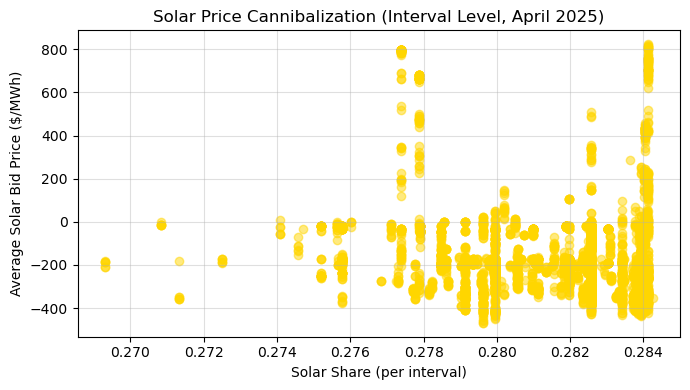

In [103]:
plt.figure(figsize=(7,4))
plt.scatter(df_cannibal['Solar Share'], df_cannibal['Avg Solar Bid Price'], color='#ffd600', alpha=0.5)
plt.xlabel('Solar Share (per interval)')
plt.ylabel('Average Solar Bid Price ($/MWh)')
plt.title('Solar Price Cannibalization (Interval Level, April 2025)')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

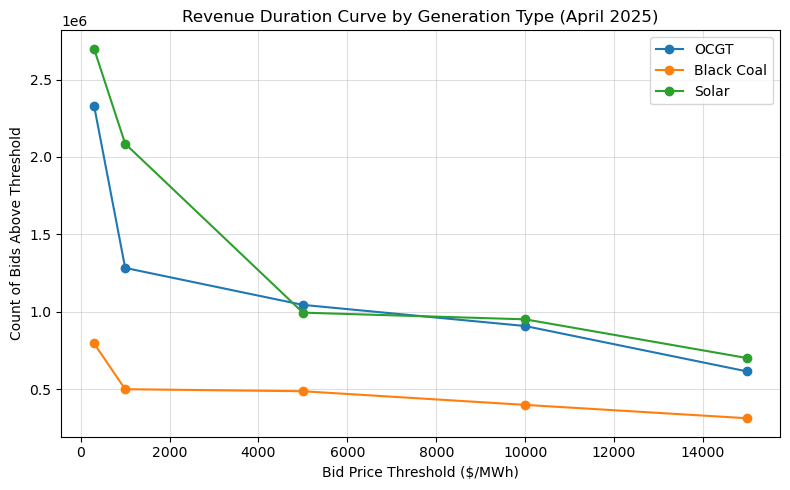

In [104]:
import numpy as np
import matplotlib.pyplot as plt

price_thresholds = [300, 1000, 5000, 10000, 15000]
duration_data = {}

for gtype in bid_2025['Generation Type'].unique():
    # Gather all offered MW and their bid prices (all bands, all intervals, all units)
    prices = []
    for i in range(1, 11):
        df = bid_2025[bid_2025['Generation Type']==gtype]
        prices.extend(df[f'PRICEBAND{i}'].values)
    prices = np.array(prices)
    durations = [(prices >= thresh).sum() for thresh in price_thresholds]
    duration_data[gtype] = durations

# Plot
plt.figure(figsize=(8,5))
for gtype, durations in duration_data.items():
    plt.plot(price_thresholds, durations, marker='o', label=gtype)
plt.xlabel('Bid Price Threshold ($/MWh)')
plt.ylabel('Count of Bids Above Threshold')
plt.title('Revenue Duration Curve by Generation Type (April 2025)')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

                   AVG_BID_PRICE  SOLAR_SHARE  TOTAL_OFFERED_ALL
AVG_BID_PRICE           1.000000     0.136133          -0.132516
SOLAR_SHARE             0.136133     1.000000          -0.999927
TOTAL_OFFERED_ALL      -0.132516    -0.999927           1.000000


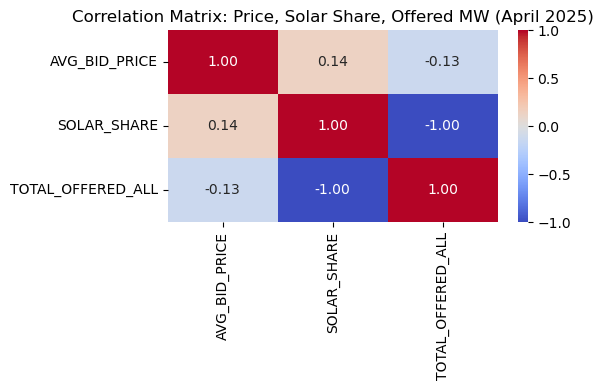

In [105]:
import pandas as pd

# 1. For each interval, calculate:
# - Solar share (already computed earlier as 'SOLAR_SHARE')
# - Total offered MW (already as 'TOTAL_OFFERED_ALL')
# - Average bid price for all gen types

# Calculate average bid price per interval, for ALL offers
bid_2025['ALL_BID_PRICES'] = 0
for i in range(1,11):
    bid_2025['ALL_BID_PRICES'] += bid_2025[f'PRICEBAND{i}'] * bid_2025[f'BANDAVAIL{i}']
bid_2025['ALL_OFFERED_MW'] = bid_2025[[f'BANDAVAIL{i}' for i in range(1,11)]].sum(axis=1)

# Group by interval
grouped = bid_2025.groupby('INTERVAL_DATETIME').agg({
    'SOLAR_SHARE': 'mean',
    'TOTAL_OFFERED_ALL': 'mean',
    'ALL_BID_PRICES': 'sum',
    'ALL_OFFERED_MW': 'sum'
}).reset_index()

# Average price per interval
grouped['AVG_BID_PRICE'] = grouped['ALL_BID_PRICES'] / grouped['ALL_OFFERED_MW']

# 2. Make the correlation matrix
df_corr = grouped[['AVG_BID_PRICE', 'SOLAR_SHARE', 'TOTAL_OFFERED_ALL']]
corr_matrix = df_corr.corr()
print(corr_matrix)

# 3. Plot as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Price, Solar Share, Offered MW (April 2025)')
plt.tight_layout()
plt.show()

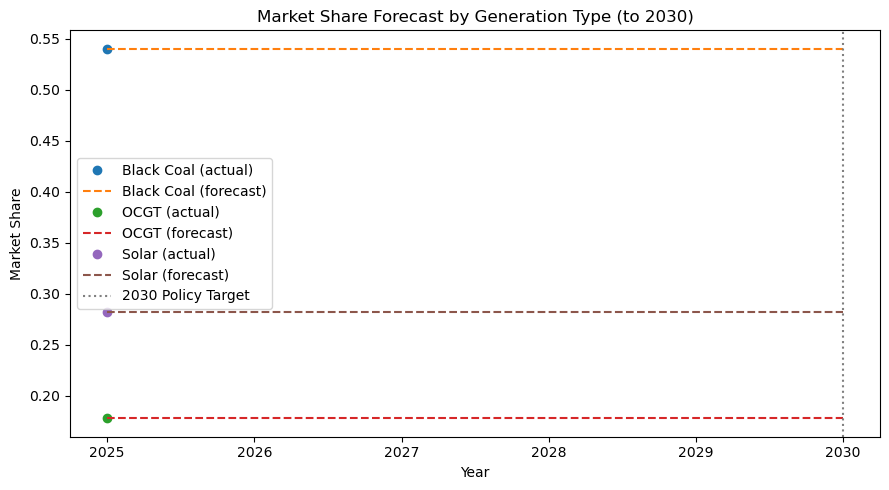

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# First, ensure you have a 'Year' column
bid_2025['Year'] = pd.to_datetime(bid_2025['INTERVAL_DATETIME']).dt.year

# Calculate annual total offered MW by generation type
annual = bid_2025.groupby(['Year', 'Generation Type'])['OFFERED_MW'].sum().reset_index()
total_annual = bid_2025.groupby('Year')['OFFERED_MW'].sum().reset_index().rename(columns={'OFFERED_MW': 'TOTAL_MW'})

# Merge to compute market share
annual = annual.merge(total_annual, on='Year')
annual['Market Share'] = annual['OFFERED_MW'] / annual['TOTAL_MW']

# Prepare forecast years
years = np.arange(annual['Year'].min(), 2031)

plt.figure(figsize=(9,5))
for gtype in annual['Generation Type'].unique():
    sub = annual[annual['Generation Type']==gtype]
    # Fit linear regression
    X = sub['Year'].values.reshape(-1,1)
    y = sub['Market Share'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(years.reshape(-1,1))
    plt.plot(sub['Year'], sub['Market Share'], 'o', label=f'{gtype} (actual)')
    plt.plot(years, y_pred, '--', label=f'{gtype} (forecast)')
plt.axvline(2030, color='gray', linestyle=':', label='2030 Policy Target')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Market Share Forecast by Generation Type (to 2030)')
plt.legend()
plt.tight_layout()
plt.show()

Current total offered MW:
 Generation Type
Black Coal    165448529.0
OCGT           54451189.0
Solar          86279050.0
Name: OFFERED_MW, dtype: float64


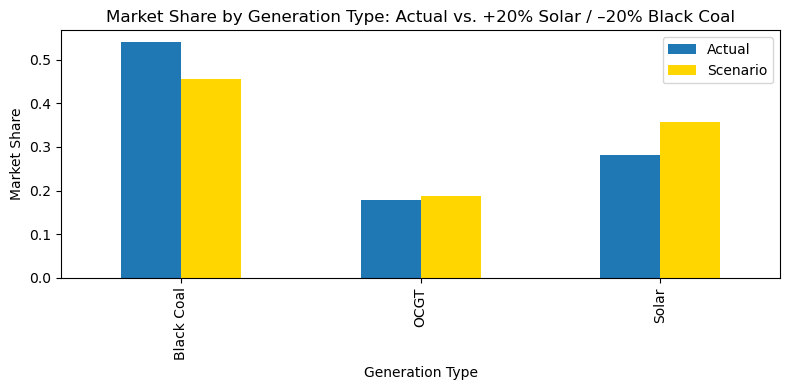

Weighted Avg Bid Price (Actual Mix): $4355.44/MWh
Weighted Avg Bid Price (Scenario Mix): $4180.54/MWh


In [111]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Calculate current total offered MW by generation type (April 2025)
current_total = bid_2025.groupby('Generation Type')['OFFERED_MW'].sum()
print("Current total offered MW:\n", current_total)

# 2. Simulate +20% solar, -20% black coal
scenario = current_total.copy()
if 'Solar' in scenario.index:
    scenario['Solar'] *= 1.2
if 'Black Coal' in scenario.index:
    scenario['Black Coal'] *= 0.8

# 3. Normalize so total stays the same (optional but realistic)
scen_total_sum = scenario.sum()
orig_total_sum = current_total.sum()
scenario *= orig_total_sum / scen_total_sum

# 4. Calculate market share for actual vs scenario
actual_share = (current_total / current_total.sum()).rename('Actual')
scenario_share = (scenario / scenario.sum()).rename('Scenario')
market_share = pd.concat([actual_share, scenario_share], axis=1)

# 5. Plot market share comparison
market_share.plot(kind='bar', figsize=(8,4), color=['#1f77b4', '#ffd600'])
plt.title('Market Share by Generation Type: Actual vs. +20% Solar / –20% Black Coal')
plt.ylabel('Market Share')
plt.tight_layout()
plt.show()

# 6. (Optional) Estimate scenario weighted average bid price
# Use actual weighted average prices for each tech as proxy
weighted_avg_prices = {}
for g in current_total.index:
    offers = bid_2025[bid_2025['Generation Type'] == g]
    total_mw = offers['OFFERED_MW'].sum()
    if total_mw > 0:
        price_sum = 0
        mw_sum = 0
        for i in range(1, 11):
            price_sum += (offers[f'PRICEBAND{i}'] * offers[f'BANDAVAIL{i}']).sum()
            mw_sum += offers[f'BANDAVAIL{i}'].sum()
        weighted_avg_prices[g] = price_sum / mw_sum if mw_sum > 0 else np.nan
    else:
        weighted_avg_prices[g] = np.nan

actual_market_price = sum(current_total[g] * weighted_avg_prices[g] for g in current_total.index if g in weighted_avg_prices) / current_total.sum()
scenario_market_price = sum(scenario[g] * weighted_avg_prices[g] for g in scenario.index if g in weighted_avg_prices) / scenario.sum()

print(f"Weighted Avg Bid Price (Actual Mix): ${actual_market_price:.2f}/MWh")
print(f"Weighted Avg Bid Price (Scenario Mix): ${scenario_market_price:.2f}/MWh")

Break-even analysis (intervals with avg bid price > break-even):
Solar: 373/8640 intervals (4.3%)
OCGT: 8640/8640 intervals (100.0%)


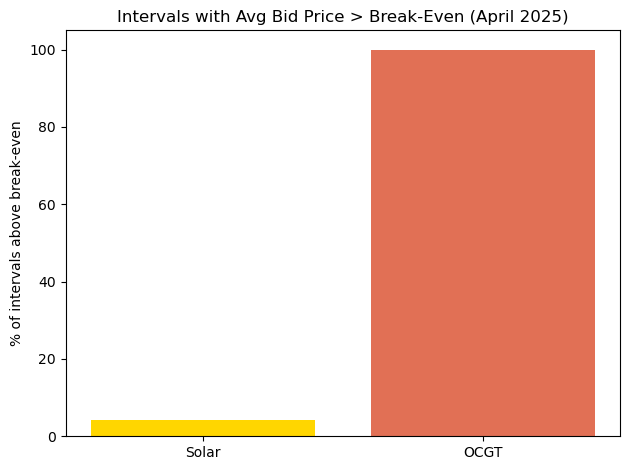

In [112]:
# 1. For each interval, calculate average bid price for each technology
avg_prices = []
for dt, df_dt in bid_2025.groupby('INTERVAL_DATETIME'):
    row = {'INTERVAL_DATETIME': dt}
    for g in ['Solar', 'OCGT']:
        offers = df_dt[df_dt['Generation Type']==g]
        mw = offers['OFFERED_MW'].sum()
        if mw > 0:
            price_sum = 0
            mw_sum = 0
            for i in range(1, 11):
                price_sum += (offers[f'PRICEBAND{i}'] * offers[f'BANDAVAIL{i}']).sum()
                mw_sum += offers[f'BANDAVAIL{i}'].sum()
            row[g] = price_sum / mw_sum if mw_sum > 0 else np.nan
        else:
            row[g] = np.nan
    avg_prices.append(row)
df_avg = pd.DataFrame(avg_prices)

# 2. Calculate % of intervals above break-even for each tech
break_even = {'Solar': 50, 'OCGT': 80}
results = {}
for g in ['Solar', 'OCGT']:
    n_total = df_avg[g].notna().sum()
    n_profitable = (df_avg[g] > break_even[g]).sum()
    pct = n_profitable / n_total * 100 if n_total > 0 else 0
    results[g] = (n_profitable, n_total, pct)

print(f"Break-even analysis (intervals with avg bid price > break-even):")
for g, (prof, total, pct) in results.items():
    print(f"{g}: {prof}/{total} intervals ({pct:.1f}%)")

# 3. Visualize
plt.bar(results.keys(), [v[2] for v in results.values()], color=['#ffd600', '#e17055'])
plt.ylabel('% of intervals above break-even')
plt.title('Intervals with Avg Bid Price > Break-Even (April 2025)')
plt.tight_layout()
plt.show()